In [1]:
import pandas as pd
# import os
import geopy.distance
# from dotenv import load_dotenv
# from sqlalchemy import create_engine

# load_dotenv()

# DATABASE = os.getenv('DATABASE')
# USER_DB = os.getenv('USER_DB')
# PASSWORD = os.getenv('PASSWORD')
# HOST = os.getenv('HOST')
# PORT = os.getenv('PORT')
# DB_STRING = os.getenv('DB_STRING')

# db = create_engine(DB_STRING)

In [2]:
#import the data from a csv-file
df_import = pd.read_csv('data/everything.csv')

In [3]:
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Create a map centered around Seattle
seattle_coords = (47.6062, -122.3321)
m = folium.Map(location=seattle_coords, zoom_start=10)

# Create a marker cluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each house using latitude and longitude
for _, row in df_import.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(marker_cluster)

# Save the map to an HTML file
m.save('maps/house_sales_map_all.html')

# Display HTML file using an iframe
display(m)

In [4]:
# Filter the DataFrame to include rows where 'waterfront' is 1.0 or NaN
filtered_data = df_import[df_import['waterfront'].isin([1.0, float('nan')])]

# Create a map centered around Seattle
seattle_coords = (47.6062, -122.3321)
m = folium.Map(location=seattle_coords, zoom_start=10)

# Create a marker cluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each house using latitude and longitude
for _, row in filtered_data.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(marker_cluster)

filtered_data.to_csv('data/waterfront_NaN.csv',index=True)
    
# Save the map to an HTML file
m.save('maps/house_sales_map_waterfront.html')

# Display HTML file using an iframe
display(m)


In [62]:
import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame
from geopy.distance import geodesic

# Define the center of the map (Seattle)
seattle_coords = (47.6062, -122.3321)

# Define the radius (in kilometers) within which to include houses
radius_km = 25

# Function to calculate the distance between two points in kilometers
def distance_to_center(row):
    house_coords = (row['lat'], row['long'])
    return geodesic(seattle_coords, house_coords).kilometers

# Filter the DataFrame to include rows where 'waterfront' is 1.0 or NaN
filter1 = df_import[df_import['waterfront'].isin([1.0, float('nan')])]

# Filter the DataFrame to include only rows within the specified radius
filtered2 = filter1[filter1.apply(distance_to_center, axis=1) <= radius_km]

# Create a map centered around Seattle
m = folium.Map(location=seattle_coords, zoom_start=10)

# Create a marker cluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each house within the radius
for _, row in filtered2.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(marker_cluster)
    
filtered2.to_csv('data/25km_waterfront_NaN.csv',index=True)

# Save the map to an HTML file
m.save('maps/house_sales_map_within_radius_waterfront.html')

# Display HTML file using an iframe
display(m)


In [63]:
# Define the center of the map (Seattle)
seattle_coords = (47.6062, -122.3321)

# Define the radius (in kilometers) within which to include houses
radius_km = 25

# Function to calculate the distance between two points in kilometers
def distance_to_center(row):
    house_coords = (row['lat'], row['long'])
    return geodesic(seattle_coords, house_coords).kilometers

# Filter the DataFrame to include rows where 'waterfront' is 1.0
filter1 = df_import[df_import['waterfront'].isin([1.0])]

# Filter the DataFrame to include only rows within the specified radius
filtered2 = filter1[filter1.apply(distance_to_center, axis=1) <= radius_km]

# Create a map centered around Seattle
m = folium.Map(location=seattle_coords, zoom_start=10)

# Create a marker cluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each house within the radius
for _, row in filtered2.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(marker_cluster)
    
filtered2.to_csv('data/25km_waterfront.csv',index=True)

# Save the map to an HTML file
m.save('maps/house_sales_map_within_radius_waterfront_notNaN.html')

# Display HTML file using an iframe
display(m)


In [7]:
df_filtered = pd.read_csv('data/25km_waterfront.csv')
df_filtered

Unnamed: 0     id        date      price    house_id  bedrooms  \
0            49     50  2015-03-11  1350000.0   822039084       3.0   
1           230    231  2015-04-13   655000.0  8096000060       2.0   
2           246    247  2014-09-29  2400000.0  2025069065       4.0   
3           264    265  2014-10-27   369900.0  2123039032       1.0   
4           300    301  2014-06-24  3080000.0  3225069065       4.0   
..          ...    ...         ...        ...         ...       ...   
121       19968  19969  2015-03-17  1900000.0  2025069140       3.0   
122       20309  20310  2014-08-11  3000000.0   518500480       3.0   
123       20751  20752  2015-04-17  2300000.0  8043700105       4.0   
124       21185  21186  2014-10-08  2230000.0   518500460       3.0   
125       21560  21561  2015-01-07  3570000.0  9253900271       5.0   

     bathrooms  sqft_living  sqft_lot  floors  ...  sqft_above  sqft_basement  \
0         2.50       2753.0   65005.0     1.0  ...      2165.0          588.0   
1         1.75       1450.0   15798.0     2.0  ...      1230.0          220.0   
2         2.50       3650.0    8354.0     1.0  ...      1830.0         1820.0   
3         0.75        760.0   10079.0     1.0  ...       760.0            0.0   
4         5.00       4550.0   18641.0     1.0  ...      2600.0         1950.0   
..         ...          ...       ...     ...  ...         ...            ...   
121       2.50       2830.0    4334.0     3.0  ...      2830.0            0.0   
122       3.50       4410.0   10756.0     2.0  ...      3430.0          980.0   
123       4.00       4360.0    8175.0     2.5  ...      3940.0          420.0   
124       3.50       3760.0    5634.0     2.0  ...      2830.0          930.0   
125       4.50       4850.0   10584.0     2.0  ...      3540.0         1310.0   

     yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0        1953           NaN    98070  47.4041 -122.451         2680.0   
1        1915        1978.0    98166  47.4497 -122.375         2030.0   
2        2000           NaN    98074  47.6338 -122.072         3120.0   
3        1936           NaN    98070  47.4683 -122.438         1230.0   
4        2002           NaN    98074  47.6053 -122.077         4550.0   
..        ...           ...      ...      ...      ...            ...   
121      2006           NaN    98074  47.6318 -122.071         2830.0   
122      2014           NaN    98056  47.5283 -122.205         3550.0   
123      2007           NaN    98008  47.5724 -122.104         2670.0   
124      2014           NaN    98056  47.5285 -122.205         3560.0   
125      2007           NaN    98008  47.5943 -122.110         3470.0   

     sqft_lot15  price_sqft  
0       72513.0  490.374137  
1       13193.0  451.724138  
2       18841.0  657.534247  
3       14267.0  486.710526  
4       19508.0  676.923077  
..          ...         ...  
121     38211.0  671.378092  
122      5634.0  680.272109  
123      8525.0  527.522936  
124      5762.0  593.085106  
125     18270.0  736.082474  

[126 rows x 24 columns]

In [8]:
df_filtered['zipcode'].nunique()

28

In [9]:
df_filtered['zipcode'].value_counts()

zipcode
98166    14
98070    11
98040    11
98008     9
98178     9
98075     8
98074     6
98146     6
98125     6
98034     5
98155     5
98136     5
98006     4
98052     3
98056     3
98118     3
98105     3
98033     3
98144     2
98027     2
98198     1
98039     1
98177     1
98199     1
98115     1
98116     1
98004     1
98028     1
Name: count, dtype: int64

In [10]:
df_filtered.groupby('zipcode')['price'].describe()

count          mean           std        min        25%        50%  \
zipcode                                                                       
98004      1.0  7.060000e+06           NaN  7060000.0  7060000.0  7060000.0   
98006      4.0  1.575000e+06  3.926406e+05  1000000.0  1487500.0  1725000.0   
98008      9.0  2.572222e+06  8.460464e+05  1400000.0  1700000.0  2700000.0   
98027      2.0  2.400000e+06  2.828427e+05  2200000.0  2300000.0  2400000.0   
98028      1.0  1.600000e+06           NaN  1600000.0  1600000.0  1600000.0   
98033      3.0  3.736667e+06  1.239771e+06  2700000.0  3050000.0  3400000.0   
98034      5.0  2.550000e+06  7.156116e+05  1600000.0  1960000.0  3000000.0   
98039      1.0  3.640000e+06           NaN  3640000.0  3640000.0  3640000.0   
98040     11.0  3.015455e+06  1.225172e+06  1200000.0  2225000.0  2700000.0   
98052      3.0  1.683333e+06  5.251984e+05  1150000.0  1425000.0  1700000.0   
98056      3.0  2.266667e+06  7.157048e+05  1570000.0  1900000.0  2230000.0   
98070     11.0  5.216273e+05  3.117314e+05   285000.0   340000.0   385000.0   
98074      6.0  1.998333e+06  7.128090e+05   960000.0  1712500.0  1950000.0   
98075      8.0  2.033750e+06  7.007942e+05  1250000.0  1430000.0  1925000.0   
98105      3.0  3.053333e+06  5.522982e+05  2560000.0  2755000.0  2950000.0   
98115      1.0  2.300000e+06           NaN  2300000.0  2300000.0  2300000.0   
98116      1.0  1.710000e+06           NaN  1710000.0  1710000.0  1710000.0   
98118      3.0  1.819983e+06  9.918384e+05   949950.0  1279975.0  1610000.0   
98125      6.0  1.461667e+06  3.434773e+05  1150000.0  1227500.0  1350000.0   
98136      5.0  1.413600e+06  5.826961e+05   658000.0  1180000.0  1340000.0   
98144      2.0  2.750000e+06  1.202082e+06  1900000.0  2325000.0  2750000.0   
98146      6.0  1.005833e+06  3.188168e+05   540000.0   806250.0  1067500.0   
98155      5.0  2.202000e+06  1.311800e+06  1180000.0  1680000.0  1800000.0   
98166     14.0  1.248286e+06  6.204680e+05   380000.0   814375.0   991750.0   
98177      1.0  1.300000e+06           NaN  1300000.0  1300000.0  1300000.0   
98178      9.0  9.193889e+05  3.164931e+05   700000.0   750000.0   825000.0   
98198      1.0  9.500000e+05           NaN   950000.0   950000.0   950000.0   
98199      1.0  1.880000e+06           NaN  1880000.0  1880000.0  1880000.0   

               75%        max  
zipcode                        
98004    7060000.0  7060000.0  
98006    1812500.0  1850000.0  
98008    3300000.0  3570000.0  
98027    2500000.0  2600000.0  
98028    1600000.0  1600000.0  
98033    4255000.0  5110000.0  
98034    3070000.0  3120000.0  
98039    3640000.0  3640000.0  
98040    3625000.0  5300000.0  
98052    1950000.0  2200000.0  
98056    2615000.0  3000000.0  
98070     581500.0  1350000.0  
98074    2300000.0  3080000.0  
98075    2487500.0  3200000.0  
98105    3300000.0  3650000.0  
98115    2300000.0  2300000.0  
98116    1710000.0  1710000.0  
98118    2255000.0  2900000.0  
98125    1600000.0  2050000.0  
98136    1660000.0  2230000.0  
98144    3175000.0  3600000.0  
98146    1190000.0  1410000.0  
98155    1850000.0  4500000.0  
98166    1625000.0  2510000.0  
98177    1300000.0  1300000.0  
98178     869000.0  1700000.0  
98198     950000.0   950000.0  
98199    1880000.0  1880000.0

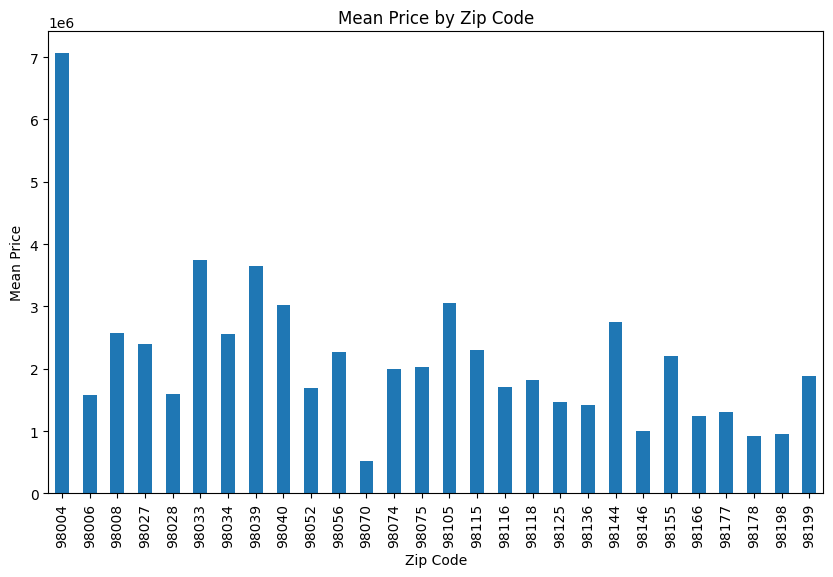

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered is your DataFrame

# Group by 'zip code' and calculate the description of 'price'
price_description_by_zip = df_filtered.groupby('zipcode')['price'].describe()

# Plot the mean price for each zip code
price_description_by_zip['mean'].plot(kind='bar', figsize=(10, 6))
plt.title('Mean Price by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Mean Price')
plt.show()


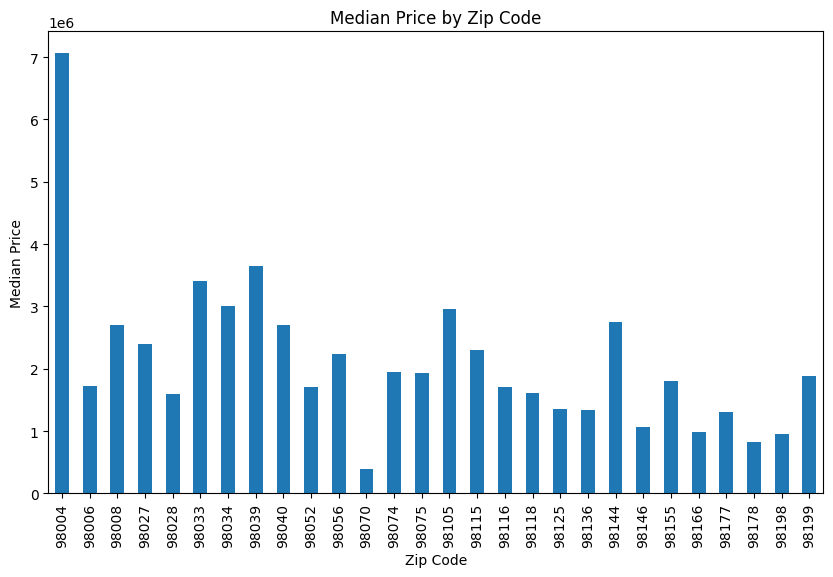

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered is your DataFrame

# Group by 'zip code' and calculate the description of 'price'
price_description_by_zip = df_filtered.groupby('zipcode')['price'].describe()

# Plot the median price for each zip code
price_description_by_zip['50%'].plot(kind='bar', figsize=(10, 6))
plt.title('Median Price by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Median Price')
plt.show()


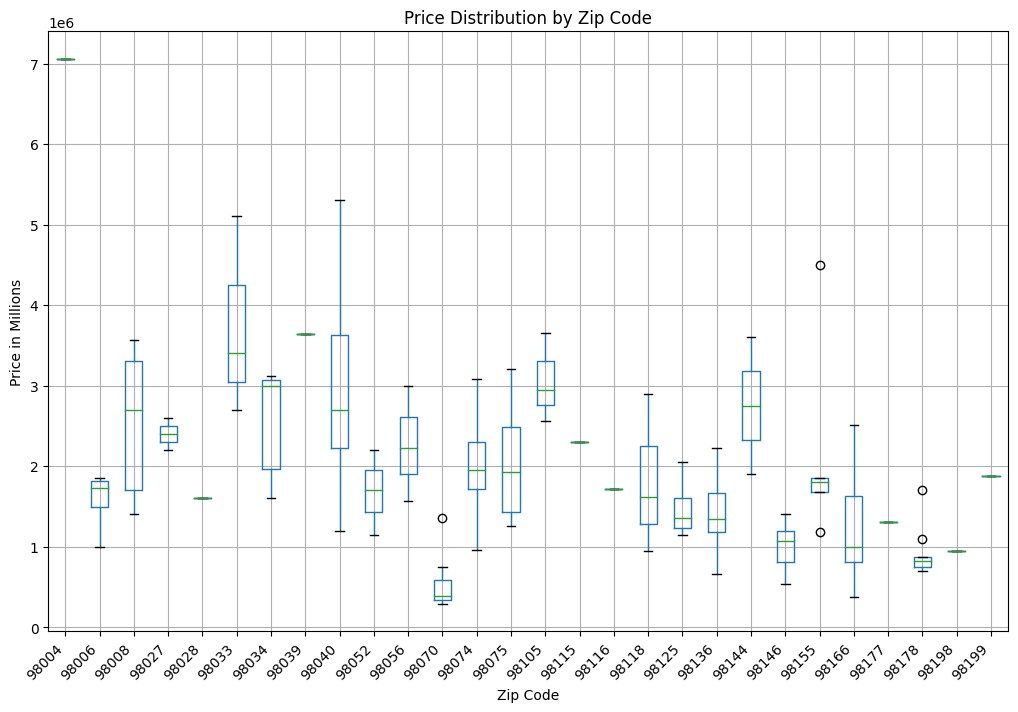

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered is your DataFrame

# Create a box plot of prices grouped by zip code
ax = df_filtered.boxplot(column='price', by='zipcode', figsize=(12, 8))
plt.title('Price Distribution by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Price in Millions')
plt.suptitle('')

# Rotate the x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()



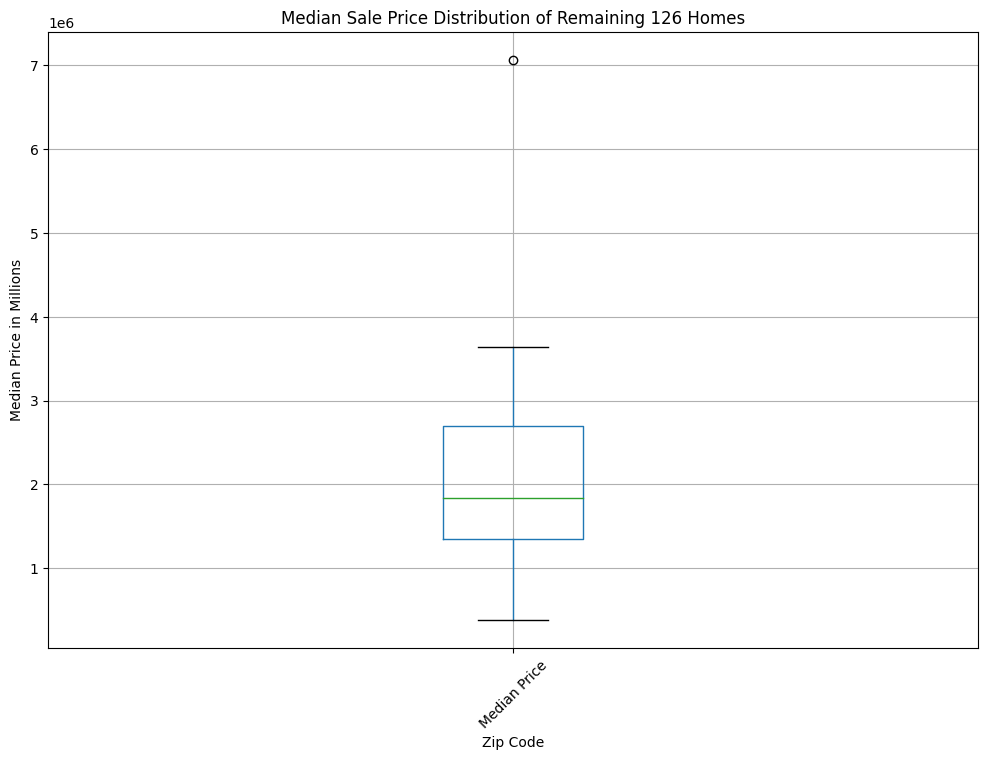

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered is your DataFrame

# Calculate the median price for each zip code
median_prices_by_zip = df_filtered.groupby('zipcode')['price'].median()

# Create a DataFrame with the median prices
median_prices_df = pd.DataFrame({'Zip Code': median_prices_by_zip.index, 'Median Price': median_prices_by_zip.values})

# Create a box plot of median prices
plt.figure(figsize=(12, 8))
median_prices_df.boxplot(column='Median Price')
plt.title('Median Sale Price Distribution of Remaining Zip Codes')
plt.ylabel('Median Price in Millions')
plt.xlabel('Zip Code')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [15]:
# Drop rows with 'zipcode' column value of 98004
df_filtered2 = df_filtered[df_filtered['zipcode'] != 98004]
df_filtered2['zipcode'].nunique()

27

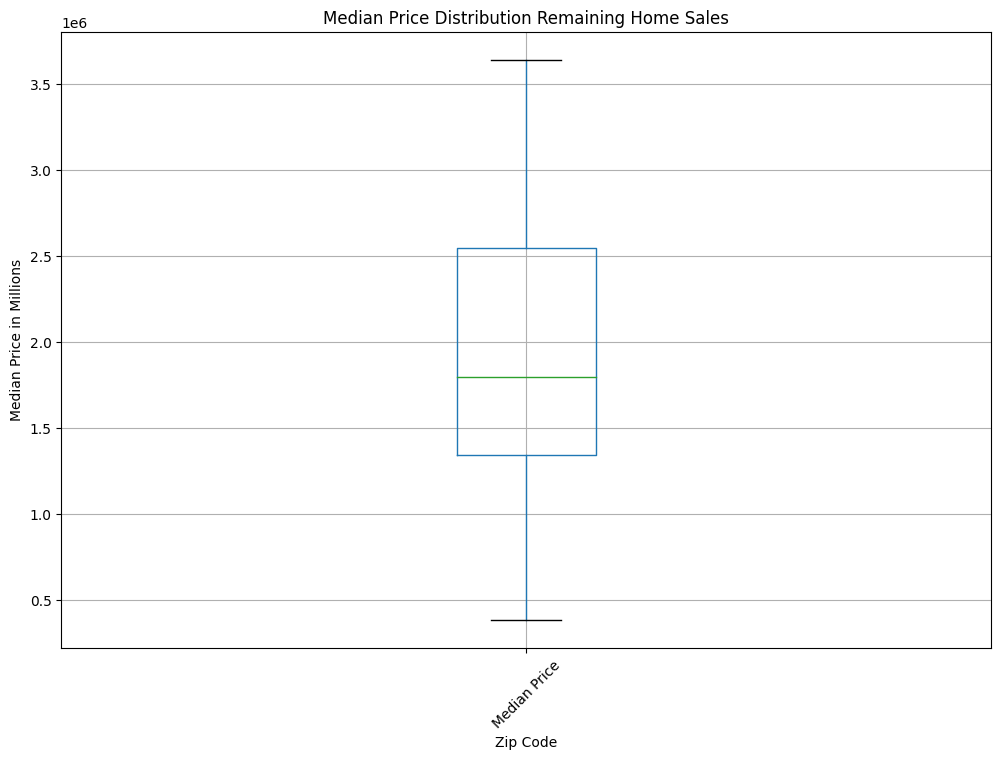

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered is your DataFrame

# Calculate the median price for each zip code
median_prices_by_zip = df_filtered2.groupby('zipcode')['price'].median()

# Create a DataFrame with the median prices
median_prices_df = pd.DataFrame({'Zip Code': median_prices_by_zip.index, 'Median Price': median_prices_by_zip.values})

# Create a box plot of median prices
plt.figure(figsize=(12, 8))
median_prices_df.boxplot(column='Median Price')
plt.title('Median Price Distribution Remaining Home Sales')
plt.ylabel('Median Price in Millions')
plt.xlabel('Zip Code')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [17]:
sum1 = (df_filtered['zipcode'] == 98004).sum()
sum1

1

In [18]:
zips = df_filtered2['zipcode'].unique()
zips

array([98070, 98166, 98074, 98034, 98178, 98033, 98040, 98052, 98155,
       98008, 98006, 98075, 98144, 98199, 98056, 98146, 98116, 98027,
       98118, 98136, 98105, 98125, 98115, 98198, 98177, 98039, 98028])

<Axes: xlabel='Zip Code'>

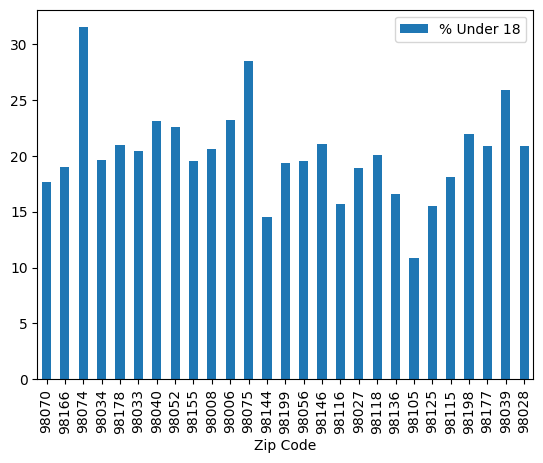

In [19]:
import pandas as pd

data = [
    "98070: 17.7%, 27.2%, 80.2%;",
    "98166: 19.0%, 19.4%, 78.0%;",
    "98074: 31.5%, 7.8%, 65.9%;",
    "98034: 19.6%, 14.6%, 78.4%;",
    "98178: 21.0%, 16.5%, 76.3%;",
    "98033: 20.4%, 13.5%, 76.0%;",
    "98040: 23.1%, 20.4%, 73.9%;",
    "98052: 22.6%, 11.2%, 75.4%;",
    "98155: 19.5%, 17.7%, 78.3%;",
    "98008: 20.6%, 19.6%, 77.0%;",
    "98006: 23.2%, 15.5%, 73.2%;",
    "98075: 28.5%, 9.0%, 69.0%;",
    "98144: 14.5%, 16.8%, 83.9%;",
    "98199: 19.4%, 15.4%, 79.9%;",
    "98056: 19.5%, 13.6%, 78.0%;",
    "98146: 21.1%, 14.7%, 75.9%;",
    "98116: 15.7%, 14.7%, 82.8%;",
    "98027: 18.9%, 15.5%, 78.4%;",
    "98118: 20.1%, 13.8%, 77.6%;",
    "98136: 16.6%, 14.6%, 82.0%;",
    "98105: 10.9%, 7.6%, 65.9%;",
    "98125: 15.5%, 17.0%, 82.4%;",
    "98115: 18.1%, 13.4%, 80.0%;",
    "98198: 22.0%, 15.5%, 74.8%;",
    "98177: 20.9%, 21.1%, 77.3%;",
    "98039: 25.9%, 18.3%, 71.2%;",
    "98028: 20.9%, 16.1%, 76.3%;"
]

# Initialize lists to store data
zip_codes = []
under_18 = []
over_65 = []
over_21 = []

# Parse each line of data
for line in data:
    parts = line.strip().split(": ")
    zip_code = parts[0]
    percentages = parts[1].split(", ")
    under_18_percent = float(percentages[0][:-1])
    over_65_percent = float(percentages[1][:-1])
    over_21_percent = float(percentages[2][:-2])  # Remove the '%' and ';' characters
    # Append data to lists
    zip_codes.append(zip_code)
    under_18.append(under_18_percent)
    over_65.append(over_65_percent)
    over_21.append(over_21_percent)

# Create DataFrame
df = pd.DataFrame({
    "Zip Code": zip_codes,
    "% Under 18": under_18,
    "% Over 65": over_65,
    "% Over 21": over_21
})


# Set the index of the DataFrame to 'Zip Code'
df.set_index('Zip Code', inplace=True)

# Plot the histogram with zip codes on the x-axis
df['% Under 18'].plot(kind='bar', legend=True)


<Axes: xlabel='Zip Code'>

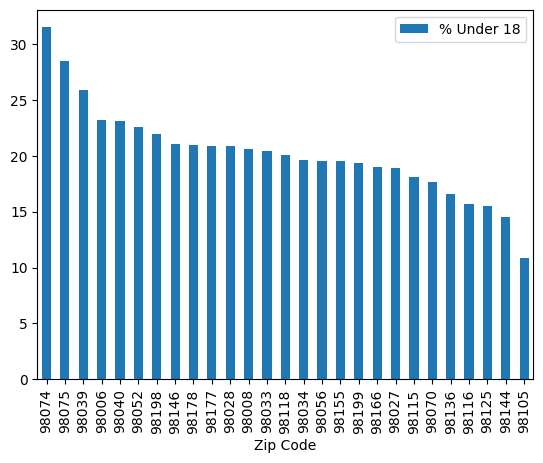

In [20]:
import pandas as pd

data = [
    "98070: 17.7%, 27.2%, 80.2%;",
    "98166: 19.0%, 19.4%, 78.0%;",
    "98074: 31.5%, 7.8%, 65.9%;",
    "98034: 19.6%, 14.6%, 78.4%;",
    "98178: 21.0%, 16.5%, 76.3%;",
    "98033: 20.4%, 13.5%, 76.0%;",
    "98040: 23.1%, 20.4%, 73.9%;",
    "98052: 22.6%, 11.2%, 75.4%;",
    "98155: 19.5%, 17.7%, 78.3%;",
    "98008: 20.6%, 19.6%, 77.0%;",
    "98006: 23.2%, 15.5%, 73.2%;",
    "98075: 28.5%, 9.0%, 69.0%;",
    "98144: 14.5%, 16.8%, 83.9%;",
    "98199: 19.4%, 15.4%, 79.9%;",
    "98056: 19.5%, 13.6%, 78.0%;",
    "98146: 21.1%, 14.7%, 75.9%;",
    "98116: 15.7%, 14.7%, 82.8%;",
    "98027: 18.9%, 15.5%, 78.4%;",
    "98118: 20.1%, 13.8%, 77.6%;",
    "98136: 16.6%, 14.6%, 82.0%;",
    "98105: 10.9%, 7.6%, 65.9%;",
    "98125: 15.5%, 17.0%, 82.4%;",
    "98115: 18.1%, 13.4%, 80.0%;",
    "98198: 22.0%, 15.5%, 74.8%;",
    "98177: 20.9%, 21.1%, 77.3%;",
    "98039: 25.9%, 18.3%, 71.2%;",
    "98028: 20.9%, 16.1%, 76.3%;"
]

# Initialize lists to store data
zip_codes = []
under_18 = []
over_65 = []
over_21 = []

# Parse each line of data
for line in data:
    parts = line.strip().split(": ")
    zip_code = parts[0]
    percentages = parts[1].split(", ")
    under_18_percent = float(percentages[0][:-1])
    over_65_percent = float(percentages[1][:-1])
    over_21_percent = float(percentages[2][:-2])  # Remove the '%' and ';' characters
    # Append data to lists
    zip_codes.append(zip_code)
    under_18.append(under_18_percent)
    over_65.append(over_65_percent)
    over_21.append(over_21_percent)

# Create DataFrame
df = pd.DataFrame({
    "Zip Code": zip_codes,
    "% Under 18": under_18,
    "% Over 65": over_65,
    "% Over 21": over_21
})

# Set the index of the DataFrame to 'Zip Code'
df.set_index('Zip Code', inplace=True)

# Sort the DataFrame by '% Under 18' column
df_sorted = df.sort_values(by='% Under 18', ascending=False)

# Plot the bar graph with zip codes on the x-axis
df_sorted['% Under 18'].plot(kind='bar', legend=True, xlabel='Zip Code')



In [21]:
df_filtered2

Unnamed: 0     id        date      price    house_id  bedrooms  \
0            49     50  2015-03-11  1350000.0   822039084       3.0   
1           230    231  2015-04-13   655000.0  8096000060       2.0   
2           246    247  2014-09-29  2400000.0  2025069065       4.0   
3           264    265  2014-10-27   369900.0  2123039032       1.0   
4           300    301  2014-06-24  3080000.0  3225069065       4.0   
..          ...    ...         ...        ...         ...       ...   
121       19968  19969  2015-03-17  1900000.0  2025069140       3.0   
122       20309  20310  2014-08-11  3000000.0   518500480       3.0   
123       20751  20752  2015-04-17  2300000.0  8043700105       4.0   
124       21185  21186  2014-10-08  2230000.0   518500460       3.0   
125       21560  21561  2015-01-07  3570000.0  9253900271       5.0   

     bathrooms  sqft_living  sqft_lot  floors  ...  sqft_above  sqft_basement  \
0         2.50       2753.0   65005.0     1.0  ...      2165.0          588.0   
1         1.75       1450.0   15798.0     2.0  ...      1230.0          220.0   
2         2.50       3650.0    8354.0     1.0  ...      1830.0         1820.0   
3         0.75        760.0   10079.0     1.0  ...       760.0            0.0   
4         5.00       4550.0   18641.0     1.0  ...      2600.0         1950.0   
..         ...          ...       ...     ...  ...         ...            ...   
121       2.50       2830.0    4334.0     3.0  ...      2830.0            0.0   
122       3.50       4410.0   10756.0     2.0  ...      3430.0          980.0   
123       4.00       4360.0    8175.0     2.5  ...      3940.0          420.0   
124       3.50       3760.0    5634.0     2.0  ...      2830.0          930.0   
125       4.50       4850.0   10584.0     2.0  ...      3540.0         1310.0   

     yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0        1953           NaN    98070  47.4041 -122.451         2680.0   
1        1915        1978.0    98166  47.4497 -122.375         2030.0   
2        2000           NaN    98074  47.6338 -122.072         3120.0   
3        1936           NaN    98070  47.4683 -122.438         1230.0   
4        2002           NaN    98074  47.6053 -122.077         4550.0   
..        ...           ...      ...      ...      ...            ...   
121      2006           NaN    98074  47.6318 -122.071         2830.0   
122      2014           NaN    98056  47.5283 -122.205         3550.0   
123      2007           NaN    98008  47.5724 -122.104         2670.0   
124      2014           NaN    98056  47.5285 -122.205         3560.0   
125      2007           NaN    98008  47.5943 -122.110         3470.0   

     sqft_lot15  price_sqft  
0       72513.0  490.374137  
1       13193.0  451.724138  
2       18841.0  657.534247  
3       14267.0  486.710526  
4       19508.0  676.923077  
..          ...         ...  
121     38211.0  671.378092  
122      5634.0  680.272109  
123      8525.0  527.522936  
124      5762.0  593.085106  
125     18270.0  736.082474  

[125 rows x 24 columns]

In [22]:
data = [
    "98070: 17.7%, 27.2%, 80.2%;",
    "98166: 19.0%, 19.4%, 78.0%;",
    "98074: 31.5%, 7.8%, 65.9%;",
    "98034: 19.6%, 14.6%, 78.4%;",
    "98178: 21.0%, 16.5%, 76.3%;",
    "98033: 20.4%, 13.5%, 76.0%;",
    "98040: 23.1%, 20.4%, 73.9%;",
    "98052: 22.6%, 11.2%, 75.4%;",
    "98155: 19.5%, 17.7%, 78.3%;",
    "98008: 20.6%, 19.6%, 77.0%;",
    "98006: 23.2%, 15.5%, 73.2%;",
    "98075: 28.5%, 9.0%, 69.0%;",
    "98144: 14.5%, 16.8%, 83.9%;",
    "98199: 19.4%, 15.4%, 79.9%;",
    "98056: 19.5%, 13.6%, 78.0%;",
    "98146: 21.1%, 14.7%, 75.9%;",
    "98116: 15.7%, 14.7%, 82.8%;",
    "98027: 18.9%, 15.5%, 78.4%;",
    "98118: 20.1%, 13.8%, 77.6%;",
    "98136: 16.6%, 14.6%, 82.0%;",
    "98105: 10.9%, 7.6%, 65.9%;",
    "98125: 15.5%, 17.0%, 82.4%;",
    "98115: 18.1%, 13.4%, 80.0%;",
    "98198: 22.0%, 15.5%, 74.8%;",
    "98177: 20.9%, 21.1%, 77.3%;",
    "98039: 25.9%, 18.3%, 71.2%;",
    "98028: 20.9%, 16.1%, 76.3%;"
]

# Initialize lists to store data
zip_codes = []
under_18 = []
over_65 = []
over_21 = []

# Parse each line of data
for line in data:
    parts = line.strip().split(": ")
    zip_code = parts[0]
    percentages = parts[1].split(", ")
    under_18_percent = float(percentages[0][:-1])
    over_65_percent = float(percentages[1][:-1])
    over_21_percent = float(percentages[2][:-2])  # Remove the '%' and ';' characters
    # Append data to lists
    zip_codes.append(zip_code)
    under_18.append(under_18_percent)
    over_65.append(over_65_percent)
    over_21.append(over_21_percent)

# Create DataFrame
df_kids = pd.DataFrame({
    "zipcode": zip_codes,
    "%_under_18": under_18,
    "%_over_65": over_65,
    "%_over_21": over_21
})

# Set the 'Zip Code' column as the index
df_kids.set_index('zipcode', inplace=True)

# Write DataFrame to a CSV file
df_kids.to_csv('data/kids.csv')

# Read the CSV file into a new DataFrame
df_kids_import = pd.read_csv('data/kids.csv', index_col='zipcode')

df_kids_import


%_under_18  %_over_65  %_over_21
zipcode                                  
98070          17.7       27.2       80.2
98166          19.0       19.4       78.0
98074          31.5        7.8       65.9
98034          19.6       14.6       78.4
98178          21.0       16.5       76.3
98033          20.4       13.5       76.0
98040          23.1       20.4       73.9
98052          22.6       11.2       75.4
98155          19.5       17.7       78.3
98008          20.6       19.6       77.0
98006          23.2       15.5       73.2
98075          28.5        9.0       69.0
98144          14.5       16.8       83.9
98199          19.4       15.4       79.9
98056          19.5       13.6       78.0
98146          21.1       14.7       75.9
98116          15.7       14.7       82.8
98027          18.9       15.5       78.4
98118          20.1       13.8       77.6
98136          16.6       14.6       82.0
98105          10.9        7.6       65.9
98125          15.5       17.0       82.4
98115          18.1       13.4       80.0
98198          22.0       15.5       74.8
98177          20.9       21.1       77.3
98039          25.9       18.3       71.2
98028          20.9       16.1       76.3

In [23]:
df_filtered2.sort_values(by='date')

Unnamed: 0     id        date      price    house_id  bedrooms  \
120       19955  19956  2014-05-08   988500.0  2623039019       3.0   
30         4009   4010  2014-05-09  2400000.0   724069059       3.0   
18         2073   2074  2014-05-12  1200000.0  3623500260       3.0   
80        14174  14175  2014-05-12   947500.0  7631200085       3.0   
67        11213  11214  2014-05-13  2560000.0  6613000935       4.0   
..          ...    ...         ...        ...         ...       ...   
45         6502   6503  2015-04-21  3650000.0  4217402115       6.0   
8          1150   1151  2015-04-21  1960000.0  4055701200       4.0   
74        12601  12602  2015-04-22  2000000.0  3225069241       3.0   
15         1415   1416  2015-05-03  1180000.0  7663700030       2.0   
14         1359   1360  2015-05-11  2200000.0  1925069082       5.0   

     bathrooms  sqft_living  sqft_lot  floors  ...  sqft_above  sqft_basement  \
120       2.75       2015.0   16807.0     2.0  ...      2015.0            NaN   
30        2.25       3000.0   11665.0     1.5  ...      3000.0            0.0   
18        1.75       1560.0    8078.0     1.5  ...      1560.0            0.0   
80        2.75       2980.0   27144.0     1.5  ...      2180.0          800.0   
67        2.50       5300.0   26211.0     2.0  ...      4570.0          730.0   
..         ...          ...       ...     ...  ...         ...            ...   
45        4.75       5480.0   19401.0     1.5  ...      3910.0         1570.0   
8         2.75       3120.0    7898.0     1.0  ...      1560.0         1560.0   
74        2.50       3490.0   21064.0     1.0  ...      2290.0         1200.0   
15        2.50       1770.0    7155.0     2.0  ...      1770.0            0.0   
14        4.25       4640.0   22703.0     2.0  ...      2860.0         1780.0   

     yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
120      2007           NaN    98166  47.4500 -122.377         1780.0   
30       2001           NaN    98075  47.5884 -122.086         3000.0   
18       1928           NaN    98040  47.5779 -122.246         2890.0   
80       1917           NaN    98166  47.4522 -122.378         1890.0   
67       1923           NaN    98105  47.6610 -122.269         3890.0   
..        ...           ...      ...      ...      ...            ...   
45       1936           NaN    98105  47.6515 -122.277         3510.0   
8        1963           NaN    98034  47.7165 -122.259         2630.0   
74       1968           NaN    98074  47.6092 -122.073         1780.0   
15       1957           NaN    98155  47.7345 -122.285         2410.0   
14       1952           NaN    98052  47.6393 -122.097         3140.0   

     sqft_lot15  price_sqft  
120     12310.0  490.570720  
30      15959.0  800.000000  
18      16710.0  769.230769  
80      12514.0  317.953020  
67      19281.0  483.018868  
..          ...         ...  
45      15810.0  666.058394  
8       13868.0  628.205128  
74      15244.0  573.065903  
15      10476.0  666.666667  
14      14200.0  474.137931  

[125 rows x 24 columns]

In [24]:
df_filtered2[df_filtered2.duplicated('house_id')]

Empty DataFrame
Columns: [Unnamed: 0, id, date, price, house_id, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, price_sqft]
Index: []

[0 rows x 24 columns]

In [25]:
df_filtered2['zipcode'].dtype

dtype('int64')

In [26]:
df_kids.index = df_kids.index.astype(int)
df_kids.index.dtype

dtype('int64')

In [27]:
df_merged = df_filtered2.merge(df_kids, how='left', left_on='zipcode', right_on='zipcode')

df_merged

Unnamed: 0     id        date      price    house_id  bedrooms  \
0            49     50  2015-03-11  1350000.0   822039084       3.0   
1           230    231  2015-04-13   655000.0  8096000060       2.0   
2           246    247  2014-09-29  2400000.0  2025069065       4.0   
3           264    265  2014-10-27   369900.0  2123039032       1.0   
4           300    301  2014-06-24  3080000.0  3225069065       4.0   
..          ...    ...         ...        ...         ...       ...   
120       19968  19969  2015-03-17  1900000.0  2025069140       3.0   
121       20309  20310  2014-08-11  3000000.0   518500480       3.0   
122       20751  20752  2015-04-17  2300000.0  8043700105       4.0   
123       21185  21186  2014-10-08  2230000.0   518500460       3.0   
124       21560  21561  2015-01-07  3570000.0  9253900271       5.0   

     bathrooms  sqft_living  sqft_lot  floors  ...  yr_renovated  zipcode  \
0         2.50       2753.0   65005.0     1.0  ...           NaN    98070   
1         1.75       1450.0   15798.0     2.0  ...        1978.0    98166   
2         2.50       3650.0    8354.0     1.0  ...           NaN    98074   
3         0.75        760.0   10079.0     1.0  ...           NaN    98070   
4         5.00       4550.0   18641.0     1.0  ...           NaN    98074   
..         ...          ...       ...     ...  ...           ...      ...   
120       2.50       2830.0    4334.0     3.0  ...           NaN    98074   
121       3.50       4410.0   10756.0     2.0  ...           NaN    98056   
122       4.00       4360.0    8175.0     2.5  ...           NaN    98008   
123       3.50       3760.0    5634.0     2.0  ...           NaN    98056   
124       4.50       4850.0   10584.0     2.0  ...           NaN    98008   

         lat     long  sqft_living15  sqft_lot15  price_sqft  %_under_18  \
0    47.4041 -122.451         2680.0     72513.0  490.374137        17.7   
1    47.4497 -122.375         2030.0     13193.0  451.724138        19.0   
2    47.6338 -122.072         3120.0     18841.0  657.534247        31.5   
3    47.4683 -122.438         1230.0     14267.0  486.710526        17.7   
4    47.6053 -122.077         4550.0     19508.0  676.923077        31.5   
..       ...      ...            ...         ...         ...         ...   
120  47.6318 -122.071         2830.0     38211.0  671.378092        31.5   
121  47.5283 -122.205         3550.0      5634.0  680.272109        19.5   
122  47.5724 -122.104         2670.0      8525.0  527.522936        20.6   
123  47.5285 -122.205         3560.0      5762.0  593.085106        19.5   
124  47.5943 -122.110         3470.0     18270.0  736.082474        20.6   

     %_over_65  %_over_21  
0         27.2       80.2  
1         19.4       78.0  
2          7.8       65.9  
3         27.2       80.2  
4          7.8       65.9  
..         ...        ...  
120        7.8       65.9  
121       13.6       78.0  
122       19.6       77.0  
123       13.6       78.0  
124       19.6       77.0  

[125 rows x 27 columns]

In [28]:
df_merged['bedrooms'].value_counts()

bedrooms
3.0    44
4.0    35
2.0    21
5.0    18
6.0     4
1.0     3
Name: count, dtype: int64

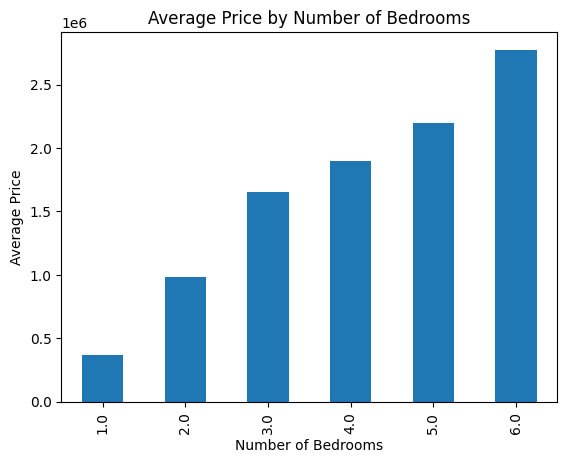

In [29]:
grouped_prices = df_merged.groupby('bedrooms')['price'].median()

# Plot the bar graph
grouped_prices.plot(kind='bar')

# Add labels and title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.title('Average Price by Number of Bedrooms')

# Show the plot
plt.show()

In [30]:
filtered_df = df_merged[(df_merged['bedrooms'] == 1.0)] #| (df_merged['bedrooms'] == 6.0)]
filtered_df['zipcode']

3      98070
54     98075
109    98070
Name: zipcode, dtype: int64

In [31]:
df_merged_bedrooms = df_merged[df_merged['bedrooms'] != 1.0]
df_merged_bedrooms

Unnamed: 0     id        date      price    house_id  bedrooms  \
0            49     50  2015-03-11  1350000.0   822039084       3.0   
1           230    231  2015-04-13   655000.0  8096000060       2.0   
2           246    247  2014-09-29  2400000.0  2025069065       4.0   
4           300    301  2014-06-24  3080000.0  3225069065       4.0   
5           540    541  2015-02-18  2130000.0   622049114       3.0   
..          ...    ...         ...        ...         ...       ...   
120       19968  19969  2015-03-17  1900000.0  2025069140       3.0   
121       20309  20310  2014-08-11  3000000.0   518500480       3.0   
122       20751  20752  2015-04-17  2300000.0  8043700105       4.0   
123       21185  21186  2014-10-08  2230000.0   518500460       3.0   
124       21560  21561  2015-01-07  3570000.0  9253900271       5.0   

     bathrooms  sqft_living  sqft_lot  floors  ...  yr_renovated  zipcode  \
0         2.50       2753.0   65005.0     1.0  ...           NaN    98070   
1         1.75       1450.0   15798.0     2.0  ...        1978.0    98166   
2         2.50       3650.0    8354.0     1.0  ...           NaN    98074   
4         5.00       4550.0   18641.0     1.0  ...           NaN    98074   
5         2.50       5403.0   24069.0     2.0  ...           NaN    98166   
..         ...          ...       ...     ...  ...           ...      ...   
120       2.50       2830.0    4334.0     3.0  ...           NaN    98074   
121       3.50       4410.0   10756.0     2.0  ...           NaN    98056   
122       4.00       4360.0    8175.0     2.5  ...           NaN    98008   
123       3.50       3760.0    5634.0     2.0  ...           NaN    98056   
124       4.50       4850.0   10584.0     2.0  ...           NaN    98008   

         lat     long  sqft_living15  sqft_lot15  price_sqft  %_under_18  \
0    47.4041 -122.451         2680.0     72513.0  490.374137        17.7   
1    47.4497 -122.375         2030.0     13193.0  451.724138        19.0   
2    47.6338 -122.072         3120.0     18841.0  657.534247        31.5   
4    47.6053 -122.077         4550.0     19508.0  676.923077        31.5   
5    47.4169 -122.348         3980.0    104374.0  394.225430        19.0   
..       ...      ...            ...         ...         ...         ...   
120  47.6318 -122.071         2830.0     38211.0  671.378092        31.5   
121  47.5283 -122.205         3550.0      5634.0  680.272109        19.5   
122  47.5724 -122.104         2670.0      8525.0  527.522936        20.6   
123  47.5285 -122.205         3560.0      5762.0  593.085106        19.5   
124  47.5943 -122.110         3470.0     18270.0  736.082474        20.6   

     %_over_65  %_over_21  
0         27.2       80.2  
1         19.4       78.0  
2          7.8       65.9  
4          7.8       65.9  
5         19.4       78.0  
..         ...        ...  
120        7.8       65.9  
121       13.6       78.0  
122       19.6       77.0  
123       13.6       78.0  
124       19.6       77.0  

[122 rows x 27 columns]

In [32]:
df_merged_bedrooms['bathrooms'].value_counts()

bathrooms
2.50    26
1.75    14
3.25    13
2.75    11
2.25     8
3.50     7
1.00     6
3.00     6
4.50     5
4.00     5
0.75     3
4.25     3
2.00     3
4.75     3
3.75     3
6.00     1
5.25     1
5.50     1
5.00     1
1.50     1
6.75     1
Name: count, dtype: int64

In [33]:
df_merged_bedrooms.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'house_id', 'bedrooms',
       'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'price_sqft', '%_under_18', '%_over_65', '%_over_21'],
      dtype='object')

In [34]:
df_merged_bedrooms

Unnamed: 0     id        date      price    house_id  bedrooms  \
0            49     50  2015-03-11  1350000.0   822039084       3.0   
1           230    231  2015-04-13   655000.0  8096000060       2.0   
2           246    247  2014-09-29  2400000.0  2025069065       4.0   
4           300    301  2014-06-24  3080000.0  3225069065       4.0   
5           540    541  2015-02-18  2130000.0   622049114       3.0   
..          ...    ...         ...        ...         ...       ...   
120       19968  19969  2015-03-17  1900000.0  2025069140       3.0   
121       20309  20310  2014-08-11  3000000.0   518500480       3.0   
122       20751  20752  2015-04-17  2300000.0  8043700105       4.0   
123       21185  21186  2014-10-08  2230000.0   518500460       3.0   
124       21560  21561  2015-01-07  3570000.0  9253900271       5.0   

     bathrooms  sqft_living  sqft_lot  floors  ...  yr_renovated  zipcode  \
0         2.50       2753.0   65005.0     1.0  ...           NaN    98070   
1         1.75       1450.0   15798.0     2.0  ...        1978.0    98166   
2         2.50       3650.0    8354.0     1.0  ...           NaN    98074   
4         5.00       4550.0   18641.0     1.0  ...           NaN    98074   
5         2.50       5403.0   24069.0     2.0  ...           NaN    98166   
..         ...          ...       ...     ...  ...           ...      ...   
120       2.50       2830.0    4334.0     3.0  ...           NaN    98074   
121       3.50       4410.0   10756.0     2.0  ...           NaN    98056   
122       4.00       4360.0    8175.0     2.5  ...           NaN    98008   
123       3.50       3760.0    5634.0     2.0  ...           NaN    98056   
124       4.50       4850.0   10584.0     2.0  ...           NaN    98008   

         lat     long  sqft_living15  sqft_lot15  price_sqft  %_under_18  \
0    47.4041 -122.451         2680.0     72513.0  490.374137        17.7   
1    47.4497 -122.375         2030.0     13193.0  451.724138        19.0   
2    47.6338 -122.072         3120.0     18841.0  657.534247        31.5   
4    47.6053 -122.077         4550.0     19508.0  676.923077        31.5   
5    47.4169 -122.348         3980.0    104374.0  394.225430        19.0   
..       ...      ...            ...         ...         ...         ...   
120  47.6318 -122.071         2830.0     38211.0  671.378092        31.5   
121  47.5283 -122.205         3550.0      5634.0  680.272109        19.5   
122  47.5724 -122.104         2670.0      8525.0  527.522936        20.6   
123  47.5285 -122.205         3560.0      5762.0  593.085106        19.5   
124  47.5943 -122.110         3470.0     18270.0  736.082474        20.6   

     %_over_65  %_over_21  
0         27.2       80.2  
1         19.4       78.0  
2          7.8       65.9  
4          7.8       65.9  
5         19.4       78.0  
..         ...        ...  
120        7.8       65.9  
121       13.6       78.0  
122       19.6       77.0  
123       13.6       78.0  
124       19.6       77.0  

[122 rows x 27 columns]

In [35]:
# Make a copy of the DataFrame
df_merged_bedrooms_copy = df_merged_bedrooms.copy()

# Drop the specified columns from the copy
# df_merged_bedrooms_copy.drop(columns=columns_to_drop, inplace=True)
df_merged_bedrooms_copy

Unnamed: 0     id        date      price    house_id  bedrooms  \
0            49     50  2015-03-11  1350000.0   822039084       3.0   
1           230    231  2015-04-13   655000.0  8096000060       2.0   
2           246    247  2014-09-29  2400000.0  2025069065       4.0   
4           300    301  2014-06-24  3080000.0  3225069065       4.0   
5           540    541  2015-02-18  2130000.0   622049114       3.0   
..          ...    ...         ...        ...         ...       ...   
120       19968  19969  2015-03-17  1900000.0  2025069140       3.0   
121       20309  20310  2014-08-11  3000000.0   518500480       3.0   
122       20751  20752  2015-04-17  2300000.0  8043700105       4.0   
123       21185  21186  2014-10-08  2230000.0   518500460       3.0   
124       21560  21561  2015-01-07  3570000.0  9253900271       5.0   

     bathrooms  sqft_living  sqft_lot  floors  ...  yr_renovated  zipcode  \
0         2.50       2753.0   65005.0     1.0  ...           NaN    98070   
1         1.75       1450.0   15798.0     2.0  ...        1978.0    98166   
2         2.50       3650.0    8354.0     1.0  ...           NaN    98074   
4         5.00       4550.0   18641.0     1.0  ...           NaN    98074   
5         2.50       5403.0   24069.0     2.0  ...           NaN    98166   
..         ...          ...       ...     ...  ...           ...      ...   
120       2.50       2830.0    4334.0     3.0  ...           NaN    98074   
121       3.50       4410.0   10756.0     2.0  ...           NaN    98056   
122       4.00       4360.0    8175.0     2.5  ...           NaN    98008   
123       3.50       3760.0    5634.0     2.0  ...           NaN    98056   
124       4.50       4850.0   10584.0     2.0  ...           NaN    98008   

         lat     long  sqft_living15  sqft_lot15  price_sqft  %_under_18  \
0    47.4041 -122.451         2680.0     72513.0  490.374137        17.7   
1    47.4497 -122.375         2030.0     13193.0  451.724138        19.0   
2    47.6338 -122.072         3120.0     18841.0  657.534247        31.5   
4    47.6053 -122.077         4550.0     19508.0  676.923077        31.5   
5    47.4169 -122.348         3980.0    104374.0  394.225430        19.0   
..       ...      ...            ...         ...         ...         ...   
120  47.6318 -122.071         2830.0     38211.0  671.378092        31.5   
121  47.5283 -122.205         3550.0      5634.0  680.272109        19.5   
122  47.5724 -122.104         2670.0      8525.0  527.522936        20.6   
123  47.5285 -122.205         3560.0      5762.0  593.085106        19.5   
124  47.5943 -122.110         3470.0     18270.0  736.082474        20.6   

     %_over_65  %_over_21  
0         27.2       80.2  
1         19.4       78.0  
2          7.8       65.9  
4          7.8       65.9  
5         19.4       78.0  
..         ...        ...  
120        7.8       65.9  
121       13.6       78.0  
122       19.6       77.0  
123       13.6       78.0  
124       19.6       77.0  

[122 rows x 27 columns]

In [36]:
columns_to_drop = ['floors', 'id', 'date']
df_merged_bedrooms_copy.drop(columns=columns_to_drop, inplace=True)
df_merged_bedrooms_copy

Unnamed: 0      price    house_id  bedrooms  bathrooms  sqft_living  \
0            49  1350000.0   822039084       3.0       2.50       2753.0   
1           230   655000.0  8096000060       2.0       1.75       1450.0   
2           246  2400000.0  2025069065       4.0       2.50       3650.0   
4           300  3080000.0  3225069065       4.0       5.00       4550.0   
5           540  2130000.0   622049114       3.0       2.50       5403.0   
..          ...        ...         ...       ...        ...          ...   
120       19968  1900000.0  2025069140       3.0       2.50       2830.0   
121       20309  3000000.0   518500480       3.0       3.50       4410.0   
122       20751  2300000.0  8043700105       4.0       4.00       4360.0   
123       21185  2230000.0   518500460       3.0       3.50       3760.0   
124       21560  3570000.0  9253900271       5.0       4.50       4850.0   

     sqft_lot  waterfront  view  condition  ...  yr_renovated  zipcode  \
0     65005.0         1.0   2.0          5  ...           NaN    98070   
1     15798.0         1.0   4.0          3  ...        1978.0    98166   
2      8354.0         1.0   4.0          3  ...           NaN    98074   
4     18641.0         1.0   4.0          3  ...           NaN    98074   
5     24069.0         1.0   4.0          4  ...           NaN    98166   
..        ...         ...   ...        ...  ...           ...      ...   
120    4334.0         1.0   4.0          3  ...           NaN    98074   
121   10756.0         1.0   4.0          3  ...           NaN    98056   
122    8175.0         1.0   4.0          3  ...           NaN    98008   
123    5634.0         1.0   4.0          3  ...           NaN    98056   
124   10584.0         1.0   4.0          3  ...           NaN    98008   

         lat     long  sqft_living15  sqft_lot15  price_sqft  %_under_18  \
0    47.4041 -122.451         2680.0     72513.0  490.374137        17.7   
1    47.4497 -122.375         2030.0     13193.0  451.724138        19.0   
2    47.6338 -122.072         3120.0     18841.0  657.534247        31.5   
4    47.6053 -122.077         4550.0     19508.0  676.923077        31.5   
5    47.4169 -122.348         3980.0    104374.0  394.225430        19.0   
..       ...      ...            ...         ...         ...         ...   
120  47.6318 -122.071         2830.0     38211.0  671.378092        31.5   
121  47.5283 -122.205         3550.0      5634.0  680.272109        19.5   
122  47.5724 -122.104         2670.0      8525.0  527.522936        20.6   
123  47.5285 -122.205         3560.0      5762.0  593.085106        19.5   
124  47.5943 -122.110         3470.0     18270.0  736.082474        20.6   

     %_over_65  %_over_21  
0         27.2       80.2  
1         19.4       78.0  
2          7.8       65.9  
4          7.8       65.9  
5         19.4       78.0  
..         ...        ...  
120        7.8       65.9  
121       13.6       78.0  
122       19.6       77.0  
123       13.6       78.0  
124       19.6       77.0  

[122 rows x 24 columns]

In [37]:
columns_to_drop = ['bedrooms', 'view', 'sqft_living15', 'sqft_living', 'waterfront', 'house_id',]
df_merged_bedrooms_copy.drop(columns=columns_to_drop, inplace=True)
df_merged_bedrooms_copy

Unnamed: 0      price  bathrooms  sqft_lot  condition  grade  sqft_above  \
0            49  1350000.0       2.50   65005.0          5      9      2165.0   
1           230   655000.0       1.75   15798.0          3      7      1230.0   
2           246  2400000.0       2.50    8354.0          3      9      1830.0   
4           300  3080000.0       5.00   18641.0          3     10      2600.0   
5           540  2130000.0       2.50   24069.0          4     12      5403.0   
..          ...        ...        ...       ...        ...    ...         ...   
120       19968  1900000.0       2.50    4334.0          3     10      2830.0   
121       20309  3000000.0       3.50   10756.0          3     11      3430.0   
122       20751  2300000.0       4.00    8175.0          3     10      3940.0   
123       21185  2230000.0       3.50    5634.0          3     11      2830.0   
124       21560  3570000.0       4.50   10584.0          3     10      3540.0   

     sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            588.0      1953           NaN    98070  47.4041 -122.451   
1            220.0      1915        1978.0    98166  47.4497 -122.375   
2           1820.0      2000           NaN    98074  47.6338 -122.072   
4           1950.0      2002           NaN    98074  47.6053 -122.077   
5              0.0      1976           NaN    98166  47.4169 -122.348   
..             ...       ...           ...      ...      ...      ...   
120            0.0      2006           NaN    98074  47.6318 -122.071   
121          980.0      2014           NaN    98056  47.5283 -122.205   
122          420.0      2007           NaN    98008  47.5724 -122.104   
123          930.0      2014           NaN    98056  47.5285 -122.205   
124         1310.0      2007           NaN    98008  47.5943 -122.110   

     sqft_lot15  price_sqft  %_under_18  %_over_65  %_over_21  
0       72513.0  490.374137        17.7       27.2       80.2  
1       13193.0  451.724138        19.0       19.4       78.0  
2       18841.0  657.534247        31.5        7.8       65.9  
4       19508.0  676.923077        31.5        7.8       65.9  
5      104374.0  394.225430        19.0       19.4       78.0  
..          ...         ...         ...        ...        ...  
120     38211.0  671.378092        31.5        7.8       65.9  
121      5634.0  680.272109        19.5       13.6       78.0  
122      8525.0  527.522936        20.6       19.6       77.0  
123      5762.0  593.085106        19.5       13.6       78.0  
124     18270.0  736.082474        20.6       19.6       77.0  

[122 rows x 18 columns]

In [38]:

df_merged_bedrooms_copy['zipcode'].value_counts()

zipcode
98166    14
98040    11
98070     9
98008     9
98178     9
98075     7
98125     6
98074     6
98146     6
98155     5
98034     5
98136     5
98006     4
98033     3
98118     3
98105     3
98056     3
98052     3
98027     2
98144     2
98039     1
98198     1
98177     1
98199     1
98115     1
98116     1
98028     1
Name: count, dtype: int64

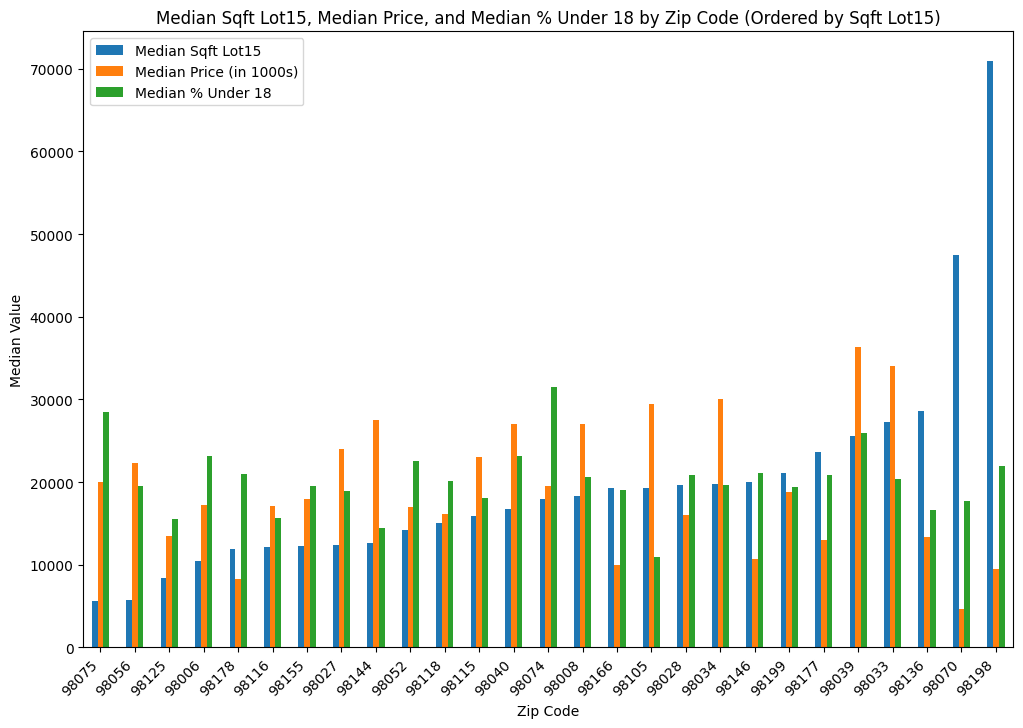

In [39]:
# Calculate median sqft_lot15 for each zipcode
median_sqft_lot15 = df_merged_bedrooms_copy.groupby('zipcode')['sqft_lot15'].median()

# Calculate median price for each zipcode and divide by 1000
median_price = df_merged_bedrooms_copy.groupby('zipcode')['price'].median() / 100

# Combine median_sqft_lot15 and median_price into a DataFrame
df_combined = pd.DataFrame({'Median Sqft Lot15': median_sqft_lot15, 'Median Price (in 1000s)': median_price})

# Sort zip codes based on median sqft_lot15
sorted_zipcodes = median_sqft_lot15.sort_values().index

# Reorder the levels of the 'zipcode' column
df_combined = df_combined.loc[sorted_zipcodes]

# Calculate median %_under_18 for each zipcode
median_under_18 = df_merged_bedrooms_copy.groupby('zipcode')['%_under_18'].median() * 1000

# Combine median_under_18 with existing DataFrame
df_combined['Median % Under 18'] = median_under_18

# Plot the three columns side by side for each zipcode
ax = df_combined.plot(kind='bar', figsize=(12, 8))

# Set title and labels
plt.title('Median Sqft Lot15, Median Price, and Median % Under 18 by Zip Code (Ordered by Sqft Lot15)')
plt.xlabel('Zip Code')
plt.ylabel('Median Value')
plt.xticks(rotation=45, ha='right')

plt.show()

In [40]:
df_19less_kids = df_merged_bedrooms_copy[df_merged_bedrooms_copy['%_under_18'] <= 19.0]
df_19less_kids


Unnamed: 0      price  bathrooms  sqft_lot  condition  grade  sqft_above  \
0            49  1350000.0       2.50   65005.0          5      9      2165.0   
1           230   655000.0       1.75   15798.0          3      7      1230.0   
5           540  2130000.0       2.50   24069.0          4     12      5403.0   
11         1166   290000.0       0.75    8313.0          4      5       440.0   
12         1259   995000.0       4.50   47044.0          3      9      3720.0   
25         2862  3600000.0       3.25   12431.0          3     10      3420.0   
26         3154  1900000.0       2.75   32044.0          3     12      3690.0   
33         4404  1710000.0       3.00   27702.0          3     10      2490.0   
40         6096   340000.0       0.75   48292.0          5      6       560.0   
41         6227  2200000.0       4.75   10450.0          3     11      4050.0   
43         6471  1340000.0       3.75   34689.0          3      9      2130.0   
44         6502  3650000.0       4.75   19401.0          5     11      3910.0   
56         9103  1360000.0       1.75   14138.0          3      8      2120.0   
58         9243  1190000.0       1.75    8112.0          4      8      1040.0   
59        10142   985000.0       2.50   26761.0          3      7      2720.0   
62        10828  1580000.0       3.00   22672.0          4      8      2610.0   
63        11061  1660000.0       2.75   19200.0          4      9      1950.0   
64        11103  1180000.0       2.50   23180.0          3      8      1100.0   
66        11213  2560000.0       2.50   26211.0          2     10      4570.0   
68        11390  2300000.0       3.25   15929.0          3     12      2720.0   
71        11832   770000.0       3.50   21744.0          4      9      1750.0   
72        12447  1900000.0       4.00   13237.0          3      8      2840.0   
74        13225   685000.0       1.00   15239.0          3      6      1370.0   
75        13564   635000.0       1.75  167125.0          4      7      1480.0   
76        13697  2600000.0       4.50   12195.0          3     11      3400.0   
79        14174   947500.0       2.75   27144.0          5      8      2180.0   
80        14605  2230000.0       3.00   28064.0          5     10      2370.0   
84        14813   465000.0       2.00   19271.0          3      7      1494.0   
86        15357   658000.0       1.00   14244.0          1      5      1010.0   
92        15678  1640000.0       3.50   21164.0          3     12      4660.0   
94        15826  1340000.0       1.75   13342.0          3      7      2300.0   
96        16173  1310000.0       2.50   12215.0          3      9      1590.0   
100       16556   340000.0       1.00   11834.0          3      6      1200.0   
101       17138   750000.0       2.50   69351.0          4      9      2960.0   
103       17544  2510000.0       3.25   57990.0          3     11      5480.0   
104       17753  2050000.0       3.25   19989.0          4      7      3480.0   
107       18023   528000.0       0.75   40642.0          4      6       840.0   
111       18541  2950000.0       3.25   25470.0          5     10      3030.0   
113       18813  1680000.0       2.50    8343.0          4      9      2150.0   
114       18833   380000.0       2.50   17342.0          3     10      1580.0   
116       18987   385000.0       1.00   26329.0          4      6       830.0   
118       19606  1150000.0       1.75    6788.0          3      7      1760.0   
119       19955   988500.0       2.75   16807.0          3      9      2015.0   

     sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            588.0      1953           NaN    98070  47.4041 -122.451   
1            220.0      1915        1978.0    98166  47.4497 -122.375   
5              0.0      1976           NaN    98166  47.4169 -122.348   
11             0.0      1943           NaN    98070  47.4339 -122.512   
12           660.0      1968        1990.0    98166  47.4734 -122.365   
25

In [41]:
df_19less_kids.reset_index(drop=True, inplace=True)
df_19less_kids

Unnamed: 0      price  bathrooms  sqft_lot  condition  grade  sqft_above  \
0           49  1350000.0       2.50   65005.0          5      9      2165.0   
1          230   655000.0       1.75   15798.0          3      7      1230.0   
2          540  2130000.0       2.50   24069.0          4     12      5403.0   
3         1166   290000.0       0.75    8313.0          4      5       440.0   
4         1259   995000.0       4.50   47044.0          3      9      3720.0   
5         2862  3600000.0       3.25   12431.0          3     10      3420.0   
6         3154  1900000.0       2.75   32044.0          3     12      3690.0   
7         4404  1710000.0       3.00   27702.0          3     10      2490.0   
8         6096   340000.0       0.75   48292.0          5      6       560.0   
9         6227  2200000.0       4.75   10450.0          3     11      4050.0   
10        6471  1340000.0       3.75   34689.0          3      9      2130.0   
11        6502  3650000.0       4.75   19401.0          5     11      3910.0   
12        9103  1360000.0       1.75   14138.0          3      8      2120.0   
13        9243  1190000.0       1.75    8112.0          4      8      1040.0   
14       10142   985000.0       2.50   26761.0          3      7      2720.0   
15       10828  1580000.0       3.00   22672.0          4      8      2610.0   
16       11061  1660000.0       2.75   19200.0          4      9      1950.0   
17       11103  1180000.0       2.50   23180.0          3      8      1100.0   
18       11213  2560000.0       2.50   26211.0          2     10      4570.0   
19       11390  2300000.0       3.25   15929.0          3     12      2720.0   
20       11832   770000.0       3.50   21744.0          4      9      1750.0   
21       12447  1900000.0       4.00   13237.0          3      8      2840.0   
22       13225   685000.0       1.00   15239.0          3      6      1370.0   
23       13564   635000.0       1.75  167125.0          4      7      1480.0   
24       13697  2600000.0       4.50   12195.0          3     11      3400.0   
25       14174   947500.0       2.75   27144.0          5      8      2180.0   
26       14605  2230000.0       3.00   28064.0          5     10      2370.0   
27       14813   465000.0       2.00   19271.0          3      7      1494.0   
28       15357   658000.0       1.00   14244.0          1      5      1010.0   
29       15678  1640000.0       3.50   21164.0          3     12      4660.0   
30       15826  1340000.0       1.75   13342.0          3      7      2300.0   
31       16173  1310000.0       2.50   12215.0          3      9      1590.0   
32       16556   340000.0       1.00   11834.0          3      6      1200.0   
33       17138   750000.0       2.50   69351.0          4      9      2960.0   
34       17544  2510000.0       3.25   57990.0          3     11      5480.0   
35       17753  2050000.0       3.25   19989.0          4      7      3480.0   
36       18023   528000.0       0.75   40642.0          4      6       840.0   
37       18541  2950000.0       3.25   25470.0          5     10      3030.0   
38       18813  1680000.0       2.50    8343.0          4      9      2150.0   
39       18833   380000.0       2.50   17342.0          3     10      1580.0   
40       18987   385000.0       1.00   26329.0          4      6       830.0   
41       19606  1150000.0       1.75    6788.0          3      7      1760.0   
42       19955   988500.0       2.75   16807.0          3      9      2015.0   

    sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           588.0      1953           NaN    98070  47.4041 -122.451   
1           220.0      1915        1978.0    98166  47.4497 -122.375   
2             0.0      1976           NaN    98166  47.4169 -122.348   
3             0.0      1943           NaN    98070  47.4339 -122.512   
4           660.0      1968        1990.0    98166  47.4734 -122.365   
5          1600.0      1941        2002.0    98144 

In [42]:
df_19less_kids['zipcode'].value_counts()


zipcode
98166    14
98070     9
98125     6
98136     5
98105     3
98144     2
98027     2
98116     1
98115     1
Name: count, dtype: int64

In [43]:
df_19less_kids['%_over_21'].value_counts()

%_over_21
78.0    14
80.2     9
82.4     6
82.0     5
65.9     3
83.9     2
78.4     2
82.8     1
80.0     1
Name: count, dtype: int64

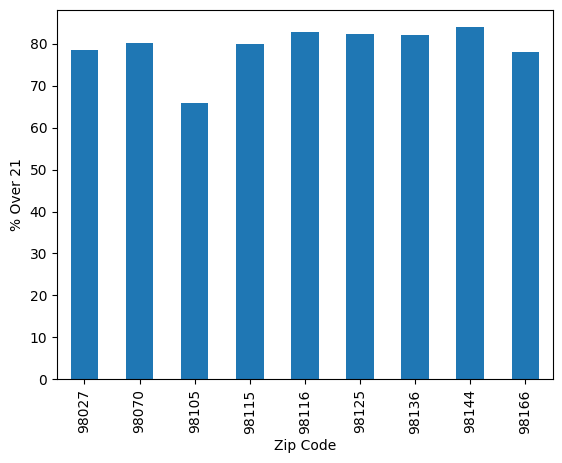

In [44]:
# Group by 'zipcode' and calculate the mean '%_over_21' for each zip code
mean_over_21_by_zipcode = df_19less_kids.groupby('zipcode')['%_over_21'].mean()

# Plot the bar graph with zip codes on the x-axis
mean_over_21_by_zipcode.plot(kind='bar', xlabel='Zip Code', ylabel='% Over 21')
plt.show()



In [45]:
df_2175_kids = df_19less_kids[df_19less_kids['%_over_21'] > 75.0]
df_2175_kids.reset_index(drop=True, inplace=True)
df_2175_kids

Unnamed: 0      price  bathrooms  sqft_lot  condition  grade  sqft_above  \
0           49  1350000.0       2.50   65005.0          5      9      2165.0   
1          230   655000.0       1.75   15798.0          3      7      1230.0   
2          540  2130000.0       2.50   24069.0          4     12      5403.0   
3         1166   290000.0       0.75    8313.0          4      5       440.0   
4         1259   995000.0       4.50   47044.0          3      9      3720.0   
5         2862  3600000.0       3.25   12431.0          3     10      3420.0   
6         3154  1900000.0       2.75   32044.0          3     12      3690.0   
7         4404  1710000.0       3.00   27702.0          3     10      2490.0   
8         6096   340000.0       0.75   48292.0          5      6       560.0   
9         6227  2200000.0       4.75   10450.0          3     11      4050.0   
10        6471  1340000.0       3.75   34689.0          3      9      2130.0   
11        9103  1360000.0       1.75   14138.0          3      8      2120.0   
12        9243  1190000.0       1.75    8112.0          4      8      1040.0   
13       10142   985000.0       2.50   26761.0          3      7      2720.0   
14       10828  1580000.0       3.00   22672.0          4      8      2610.0   
15       11061  1660000.0       2.75   19200.0          4      9      1950.0   
16       11103  1180000.0       2.50   23180.0          3      8      1100.0   
17       11390  2300000.0       3.25   15929.0          3     12      2720.0   
18       11832   770000.0       3.50   21744.0          4      9      1750.0   
19       12447  1900000.0       4.00   13237.0          3      8      2840.0   
20       13225   685000.0       1.00   15239.0          3      6      1370.0   
21       13564   635000.0       1.75  167125.0          4      7      1480.0   
22       13697  2600000.0       4.50   12195.0          3     11      3400.0   
23       14174   947500.0       2.75   27144.0          5      8      2180.0   
24       14605  2230000.0       3.00   28064.0          5     10      2370.0   
25       14813   465000.0       2.00   19271.0          3      7      1494.0   
26       15357   658000.0       1.00   14244.0          1      5      1010.0   
27       15678  1640000.0       3.50   21164.0          3     12      4660.0   
28       15826  1340000.0       1.75   13342.0          3      7      2300.0   
29       16173  1310000.0       2.50   12215.0          3      9      1590.0   
30       16556   340000.0       1.00   11834.0          3      6      1200.0   
31       17138   750000.0       2.50   69351.0          4      9      2960.0   
32       17544  2510000.0       3.25   57990.0          3     11      5480.0   
33       17753  2050000.0       3.25   19989.0          4      7      3480.0   
34       18023   528000.0       0.75   40642.0          4      6       840.0   
35       18813  1680000.0       2.50    8343.0          4      9      2150.0   
36       18833   380000.0       2.50   17342.0          3     10      1580.0   
37       18987   385000.0       1.00   26329.0          4      6       830.0   
38       19606  1150000.0       1.75    6788.0          3      7      1760.0   
39       19955   988500.0       2.75   16807.0          3      9      2015.0   

    sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           588.0      1953           NaN    98070  47.4041 -122.451   
1           220.0      1915        1978.0    98166  47.4497 -122.375   
2             0.0      1976           NaN    98166  47.4169 -122.348   
3             0.0      1943           NaN    98070  47.4339 -122.512   
4           660.0      1968        1990.0    98166  47.4734 -122.365   
5          1600.0      1941        2002.0    98144  47.5925 -122.287   
6             0.0      1989           NaN    98166  47.4485 -122.369   
7             0.0      2000           NaN    98116  47.5596 -122.403   
8           500.0      1947           NaN    98070  47.4285 -122.511   
9  

In [46]:
df_2175_kids['grade'].value_counts()

grade
9     9
7     7
8     6
6     5
12    4
10    4
11    3
5     2
Name: count, dtype: int64

In [47]:
df_2175_kids['condition'].value_counts()

condition
3    23
4    12
5     4
1     1
Name: count, dtype: int64

/var/folders/78/tz8wl15n2fnc6zfgmbfjzhwm0000gn/T/ipykernel_5434/1299544674.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2175_kids['zipcode'] = pd.Categorical(df_2175_kids['zipcode'], categories=sorted_zipcodes, ordered=True)


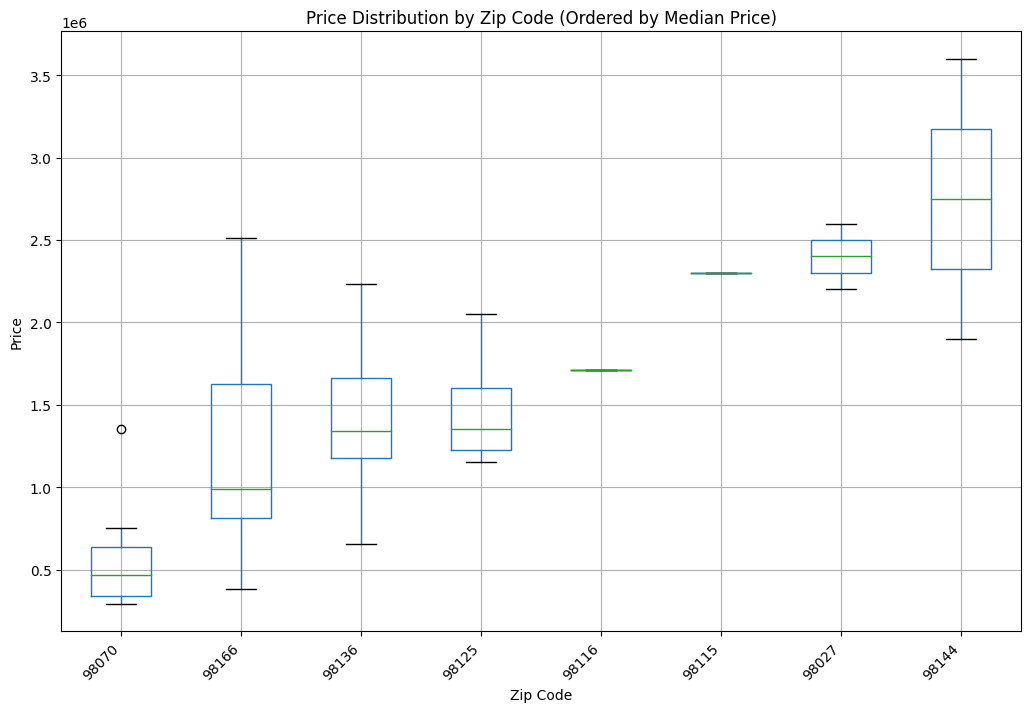

In [48]:
import matplotlib.pyplot as plt

# Calculate median price for each zip code
median_prices = df_2175_kids.groupby('zipcode')['price'].median()

# Sort zip codes based on median price
sorted_zipcodes = median_prices.sort_values().index

# Reorder the levels of the 'zipcode' column
df_2175_kids['zipcode'] = pd.Categorical(df_2175_kids['zipcode'], categories=sorted_zipcodes, ordered=True)

# Create the boxplot
ax = df_2175_kids.boxplot(column='price', by='zipcode', figsize=(12, 8))

# Set title and labels
plt.title('Price Distribution by Zip Code (Ordered by Median Price)')
plt.xlabel('Zip Code')
plt.ylabel('Price')
plt.suptitle('')

# Rotate the x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()



In [49]:
# Create a map centered around Seattle
seattle_coords = (47.6062, -122.3321)
m = folium.Map(location=seattle_coords, zoom_start=10)

# Create a marker cluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each house using latitude and longitude
for _, row in df_2175_kids.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(marker_cluster)

# Save the map to an HTML file
m.save('house_sales_narrowed_before_budget.html')

# Display HTML file using an iframe
IFrame(src='house_sales_narrowed_before_budget.html', width='100%', height=500)

/var/folders/78/tz8wl15n2fnc6zfgmbfjzhwm0000gn/T/ipykernel_5434/3234221305.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2175_kids['zipcode'] = pd.Categorical(df_2175_kids['zipcode'], categories=sorted_zipcodes, ordered=True)


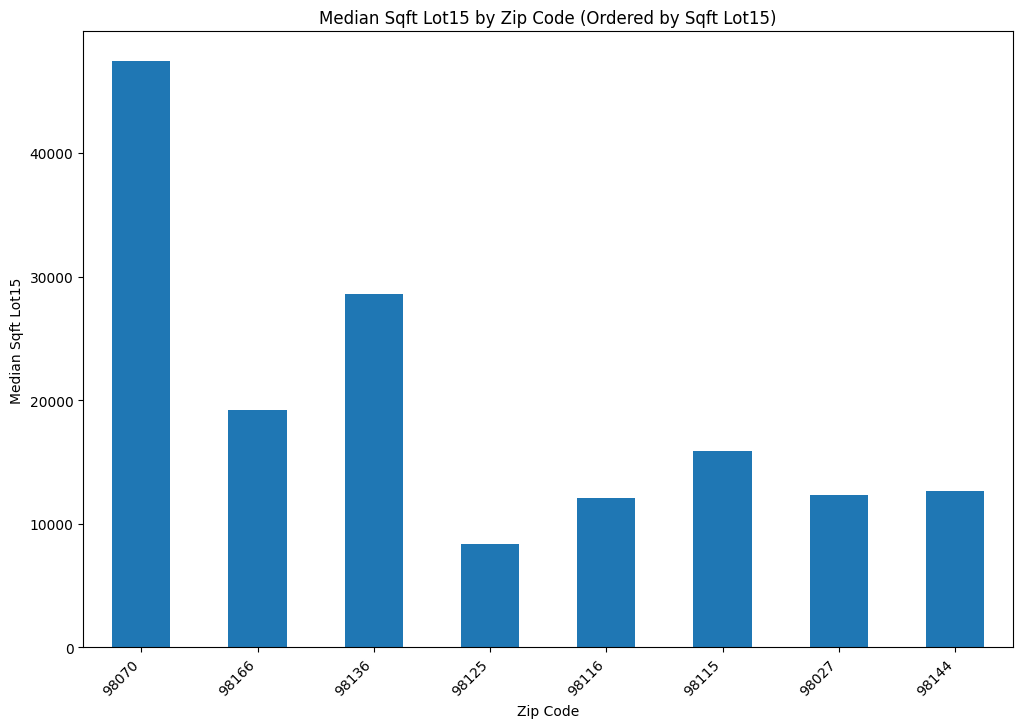

In [50]:
import matplotlib.pyplot as plt

# Calculate median sqft_lot15 for each zipcode
median_sqft_lot15 = df_2175_kids.groupby('zipcode')['sqft_lot15'].median()

# Sort zip codes based on median sqft_lot15
sorted_zipcodes = median_sqft_lot15.sort_values().index

# Reorder the levels of the 'zipcode' column
df_2175_kids['zipcode'] = pd.Categorical(df_2175_kids['zipcode'], categories=sorted_zipcodes, ordered=True)

# Plot the median sqft_lot15 by zipcode
ax = df_2175_kids.groupby('zipcode')['sqft_lot15'].median().plot(kind='bar', figsize=(12, 8))

# Set title and labels
plt.title('Median Sqft Lot15 by Zip Code (Ordered by Sqft Lot15)')
plt.xlabel('Zip Code')
plt.ylabel('Median Sqft Lot15')
plt.xticks(rotation=45, ha='right')

plt.show()


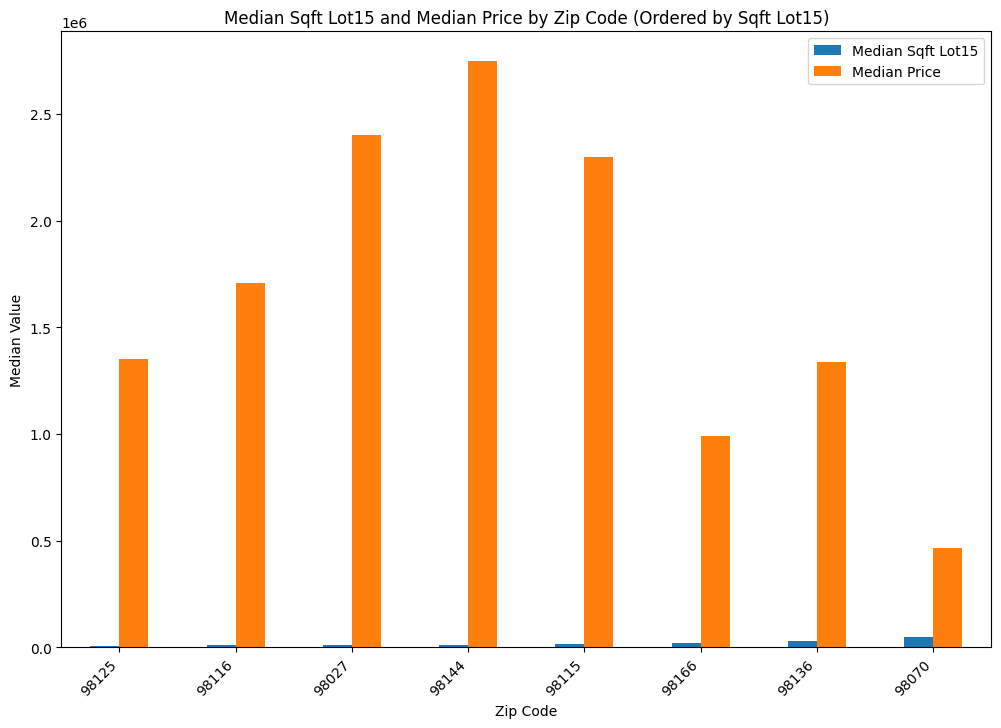

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate median sqft_lot15 for each zipcode
median_sqft_lot15 = df_2175_kids.groupby('zipcode')['sqft_lot15'].median()

# Calculate median price for each zipcode
median_price = df_2175_kids.groupby('zipcode')['price'].median()

# Combine median_sqft_lot15 and median_price into a DataFrame
df_combined = pd.DataFrame({'Median Sqft Lot15': median_sqft_lot15, 'Median Price': median_price})

# Sort zip codes based on median sqft_lot15
sorted_zipcodes = median_sqft_lot15.sort_values().index

# Reorder the levels of the 'zipcode' column
df_combined = df_combined.loc[sorted_zipcodes]

# Plot the median sqft_lot15 and median price by zipcode
ax = df_combined.plot(kind='bar', figsize=(12, 8))

# Set title and labels
plt.title('Median Sqft Lot15 and Median Price by Zip Code (Ordered by Sqft Lot15)')
plt.xlabel('Zip Code')
plt.ylabel('Median Value')
plt.xticks(rotation=45, ha='right')

plt.show()



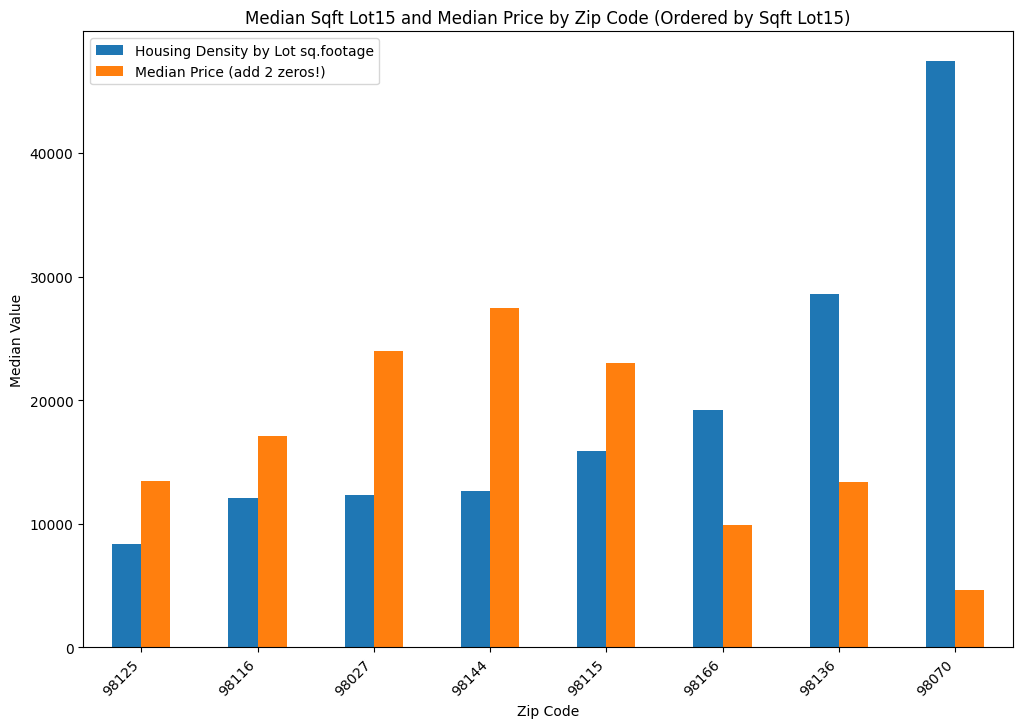

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate median sqft_lot15 for each zipcode
median_sqft_lot15 = df_2175_kids.groupby('zipcode')['sqft_lot15'].median()

# Calculate median price for each zipcode and divide by 1000
median_price = df_2175_kids.groupby('zipcode')['price'].median() / 100

# Combine median_sqft_lot15 and median_price into a DataFrame
df_combined = pd.DataFrame({'Housing Density by Lot sq.footage': median_sqft_lot15, 'Median Price (add 2 zeros!)': median_price})

# Sort zip codes based on median sqft_lot15
sorted_zipcodes = median_sqft_lot15.sort_values().index

# Reorder the levels of the 'zipcode' column
df_combined = df_combined.loc[sorted_zipcodes]

# Plot the median sqft_lot15 and median price by zipcode
ax = df_combined.plot(kind='bar', figsize=(12, 8))

# Set title and labels
plt.title('Median Sqft Lot15 and Median Price by Zip Code (Ordered by Sqft Lot15)')
plt.xlabel('Zip Code')
plt.ylabel('Median Value')
plt.xticks(rotation=45, ha='right')

plt.show()


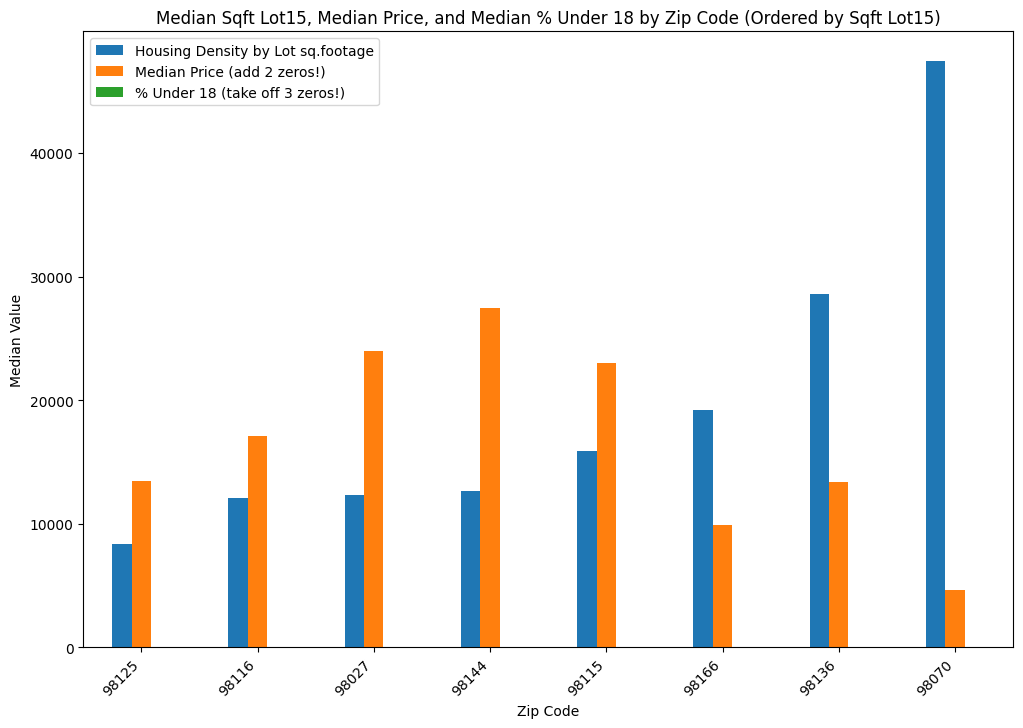

In [53]:
# Calculate median %_under_18 for each zipcode
median_under_18 = df_2175_kids.groupby('zipcode')['%_under_18'].median()

# Combine median_under_18 with existing DataFrame
df_combined['% Under 18 (take off 3 zeros!)'] = median_under_18

# Plot the three columns side by side for each zipcode
ax = df_combined.plot(kind='bar', figsize=(12, 8))

# Set title and labels
plt.title('Median Sqft Lot15, Median Price, and Median % Under 18 by Zip Code (Ordered by Sqft Lot15)')
plt.xlabel('Zip Code')
plt.ylabel('Median Value')
plt.xticks(rotation=45, ha='right')

plt.show()


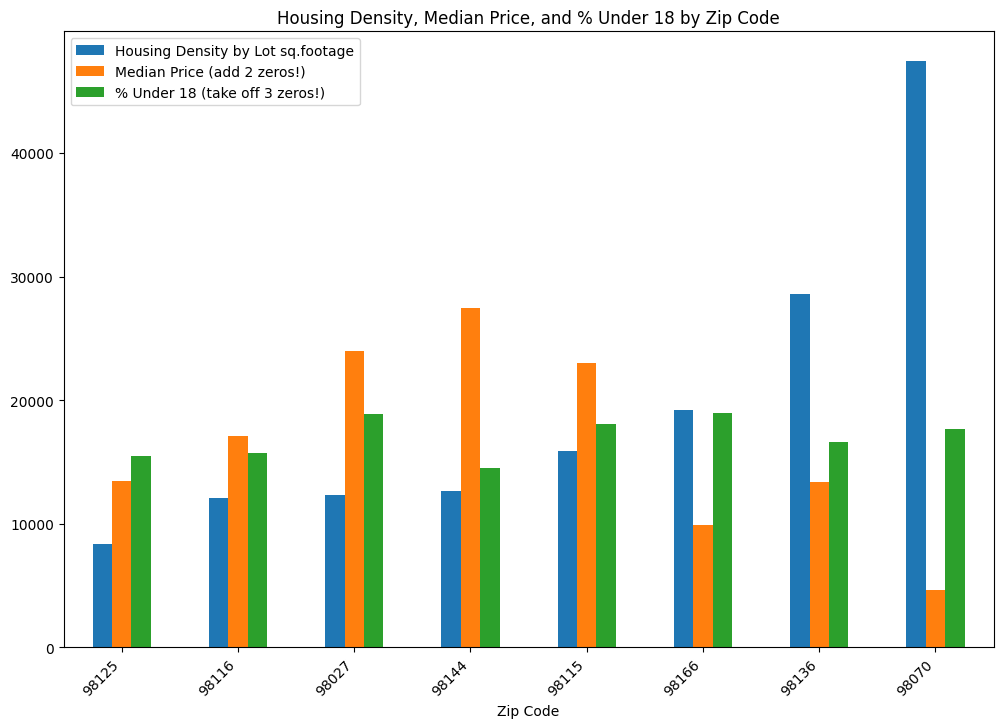

In [54]:
# Calculate median %_under_18 for each zipcode
median_under_18 = df_2175_kids.groupby('zipcode')['%_under_18'].median() * 1000

# Combine median_under_18 with existing DataFrame
df_combined['% Under 18 (take off 3 zeros!)'] = median_under_18

# Plot the three columns side by side for each zipcode
ax = df_combined.plot(kind='bar', figsize=(12, 8))

# Set title and labels
plt.title('Housing Density, Median Price, and % Under 18 by Zip Code')
plt.xlabel('Zip Code')
plt.xticks(rotation=45, ha='right')

plt.show()


In [55]:
# Define the center of the map (Seattle)
seattle_coords = (47.6062, -122.3321)

# Define the radius (in kilometers) within which to include houses
radius_km = 15

# Function to calculate the distance between two points in kilometers
def distance_to_center(row):
    house_coords = (row['lat'], row['long'])
    return geodesic(seattle_coords, house_coords).kilometers

# Filter the DataFrame to include rows where 'waterfront' is 1.0
#filter1 = df_2175_kids.copy

# Filter the DataFrame to include only rows within the specified radius
filtered2 = df_2175_kids[df_2175_kids.apply(distance_to_center, axis=1) <= radius_km]

# Create a map centered around Seattle
m = folium.Map(location=seattle_coords, zoom_start=10)

# Create a marker cluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each house within the radius
for _, row in filtered2.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(marker_cluster)
    
filtered2.to_csv('data/15km_waterfront_filters.csv',index=True)

# Save the map to an HTML file
m.save('15km_waterfront_filters.html')

# Display HTML file using an iframe
IFrame(src='15km_waterfront_filters.html', width='100%', height=720)

In [56]:
df_15km = pd.read_csv('data/15km_waterfront_filters.csv')
df_15km

Unnamed: 0.1  Unnamed: 0      price  bathrooms  sqft_lot  condition  \
0              4        1259   995000.0       4.50   47044.0          3   
1              5        2862  3600000.0       3.25   12431.0          3   
2              7        4404  1710000.0       3.00   27702.0          3   
3             10        6471  1340000.0       3.75   34689.0          3   
4             11        9103  1360000.0       1.75   14138.0          3   
5             12        9243  1190000.0       1.75    8112.0          4   
6             15       11061  1660000.0       2.75   19200.0          4   
7             16       11103  1180000.0       2.50   23180.0          3   
8             17       11390  2300000.0       3.25   15929.0          3   
9             19       12447  1900000.0       4.00   13237.0          3   
10            24       14605  2230000.0       3.00   28064.0          5   
11            26       15357   658000.0       1.00   14244.0          1   
12            28       15826  1340000.0       1.75   13342.0          3   
13            33       17753  2050000.0       3.25   19989.0          4   
14            35       18813  1680000.0       2.50    8343.0          4   
15            38       19606  1150000.0       1.75    6788.0          3   

    grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  \
0       9      3720.0          660.0      1968        1990.0    98166   
1      10      3420.0         1600.0      1941        2002.0    98144   
2      10      2490.0            0.0      2000           NaN    98116   
3       9      2130.0            0.0      1955           NaN    98136   
4       8      2120.0            NaN      1931        1991.0    98125   
5       8      1040.0         1040.0      1939        1984.0    98125   
6       9      1950.0         1570.0      1951           NaN    98136   
7       8      1100.0          870.0      1937        1998.0    98136   
8      12      2720.0         1390.0      2001           NaN    98115   
9       8      2840.0          180.0      1942        1983.0    98144   
10     10      2370.0         1250.0      1977           NaN    98136   
11      5      1010.0            0.0      1926           NaN    98136   
12      7      2300.0            0.0      1934        1958.0    98125   
13      7      3480.0          100.0      1915        1965.0    98125   
14      9      2150.0         1340.0      1939           NaN    98125   
15      7      1760.0            0.0      1940           NaN    98125   

        lat     long  sqft_lot15  price_sqft  %_under_18  %_over_65  %_over_21  
0   47.4734 -122.365     18512.0  227.168950        19.0       19.4       78.0  
1   47.5925 -122.287     12620.0  717.131474        14.5       16.8       83.9  
2   47.5596 -122.403     12119.0  686.746988        15.7       14.7       82.8  
3   47.5489 -122.398     28598.0  629.107981        16.6       14.6       82.0  
4   47.7142 -122.277      8279.0  519.083969        15.5       17.0       82.4  
5   47.7134 -122.277      8408.0  572.115385        15.5       17.0       82.4  
6   47.5250 -122.393      7000.0  471.590909        16.6       14.6       82.0  
7   47.5495 -122.398     34689.0  598.984772        16.6       14.6       82.0  
8   47.6934 -122.271     15929.0  559.610706        18.1       13.4       80.0  
9   47.5924 -122.287     12620.0  629.139073        14.5       16.8       83.9  
10  47.5516 -122.398     34713.0  616.022099        16.6       14.6       82.0  
11  47.5476 -122.399     15792.0  651.485149        16.6       14.6       82.0  
12  47.7308 -122.282     13342.0  582.608696        15.5       17.0       82.4  
13  47.7087 -122.276      6389.0  572.625698        15.5       17.0       82.4  
14  47.7265 -122.281     13104.0  481.375358        15.5       17.0       82.4  
15  47.7336 -122.284      7588.0  653.409091        15.5       17.0       82.4

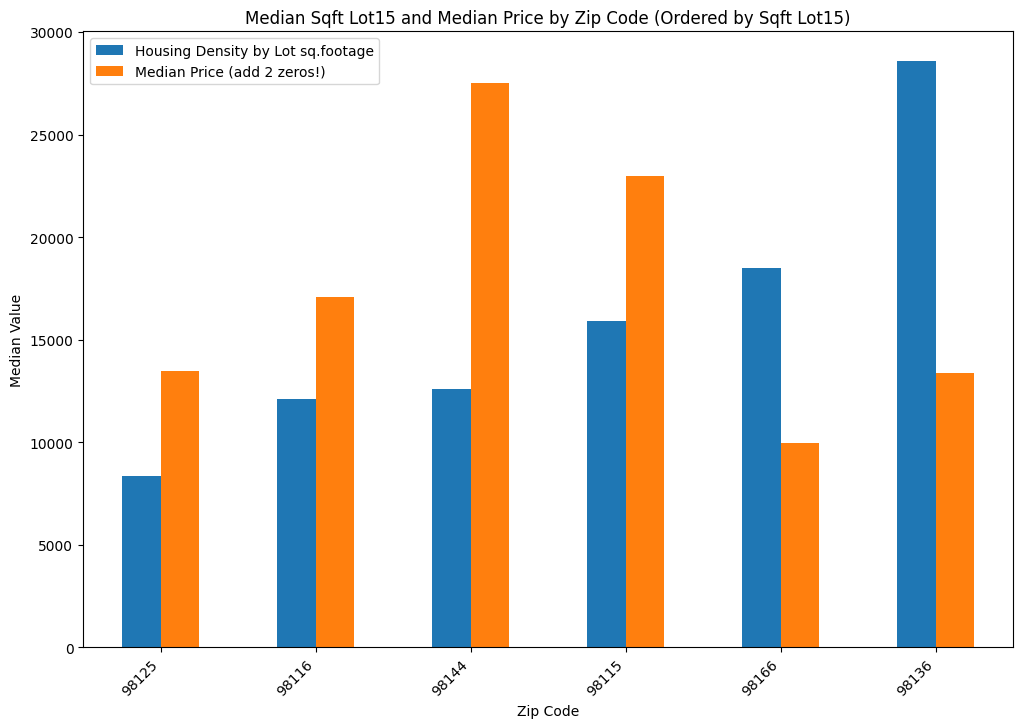

In [57]:
# Calculate median sqft_lot15 for each zipcode
median_sqft_lot15 = df_15km.groupby('zipcode')['sqft_lot15'].median()

# Calculate median price for each zipcode and divide by 1000
median_price = df_15km.groupby('zipcode')['price'].median() / 100

# Combine median_sqft_lot15 and median_price into a DataFrame
df_combined = pd.DataFrame({'Housing Density by Lot sq.footage': median_sqft_lot15, 'Median Price (add 2 zeros!)': median_price})

# Sort zip codes based on median sqft_lot15
sorted_zipcodes = median_sqft_lot15.sort_values().index

# Reorder the levels of the 'zipcode' column
df_combined = df_combined.loc[sorted_zipcodes]

# Plot the median sqft_lot15 and median price by zipcode
ax = df_combined.plot(kind='bar', figsize=(12, 8))

# Set title and labels
plt.title('Median Sqft Lot15 and Median Price by Zip Code (Ordered by Sqft Lot15)')
plt.xlabel('Zip Code')
plt.ylabel('Median Value')
plt.xticks(rotation=45, ha='right')

plt.show()

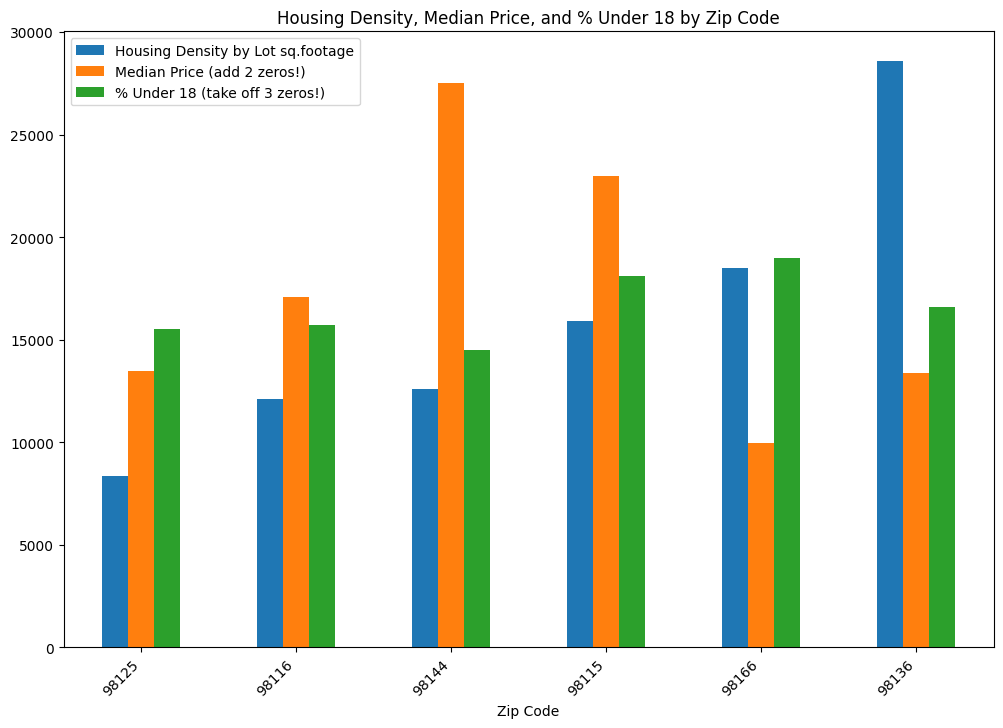

In [58]:
# Calculate median %_under_18 for each zipcode
median_under_18 = df_15km.groupby('zipcode')['%_under_18'].median() * 1000

# Combine median_under_18 with existing DataFrame
df_combined['% Under 18 (take off 3 zeros!)'] = median_under_18

# Plot the three columns side by side for each zipcode
ax = df_combined.plot(kind='bar', figsize=(12, 8))

# Set title and labels
plt.title('Housing Density, Median Price, and % Under 18 by Zip Code')
plt.xlabel('Zip Code')
plt.xticks(rotation=45, ha='right')

plt.show()


In [59]:
# Define the center of the map (Seattle)
seattle_coords = (47.6062, -122.3321)

# Define the radius (in kilometers) within which to include houses
radius_km = 9

# Function to calculate the distance between two points in kilometers
def distance_to_center(row):
    house_coords = (row['lat'], row['long'])
    return geodesic(seattle_coords, house_coords).kilometers

# Filter the DataFrame to include rows where 'waterfront' is 1.0
#filter1 = df_2175_kids.copy

# Filter the DataFrame to include only rows within the specified radius
filtered2 = df_2175_kids[df_2175_kids.apply(distance_to_center, axis=1) <= radius_km]

# Create a map centered around Seattle
m = folium.Map(location=seattle_coords, zoom_start=10)

# Create a marker cluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each house within the radius
for _, row in filtered2.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(marker_cluster)
    
filtered2.to_csv('data/9km_waterfront_filters.csv',index=True)

# Save the map to an HTML file
m.save('9km_waterfront_filters.html')

# Display HTML file using an iframe
IFrame(src='9km_waterfront_filters.html', width='100%', height=720)

In [60]:
# Define the center of the map (Seattle)
seattle_coords = (47.6062, -122.3321)

# Define the radius (in kilometers) within which to include houses
radius_km = 5

# Function to calculate the distance between two points in kilometers
def distance_to_center(row):
    house_coords = (row['lat'], row['long'])
    return geodesic(seattle_coords, house_coords).kilometers

# Filter the DataFrame to include rows where 'waterfront' is 1.0
#filter1 = df_2175_kids.copy

# Filter the DataFrame to include only rows within the specified radius
filtered2 = df_2175_kids[df_2175_kids.apply(distance_to_center, axis=1) <= radius_km]

# Create a map centered around Seattle
m = folium.Map(location=seattle_coords, zoom_start=10)

# Create a marker cluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each house within the radius
for _, row in filtered2.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(marker_cluster)
    
filtered2.to_csv('data/5km_waterfront_filters.csv',index=True)

# Save the map to an HTML file
m.save('5km_waterfront_filters.html')

# Display HTML file using an iframe
IFrame(src='5km_waterfront_filters.html', width='100%', height=500)

In [61]:
df_8km = pd.read_csv('data/8km_waterfront_filters.csv')
df_8km

FileNotFoundError: [Errno 2] No such file or directory: 'data/8km_waterfront_filters.csv'

In [ ]:
df_4km = pd.read_csv('data/4km_waterfront_filters.csv')
df_4km

Unnamed: 0      price  sqft_lot  condition  grade  zipcode      lat   
0           5  3600000.0   12431.0          3     10    98144  47.5925  \
1          19  1900000.0   13237.0          3      8    98144  47.5924   

      long  sqft_lot15  price_sqft  %_under_18  %_over_65  %_over_21  
0 -122.287     12620.0  717.131474        14.5       16.8       83.9  
1 -122.287     12620.0  629.139073        14.5       16.8       83.9

In [ ]:
df_9km = pd.read_csv('data/9km_waterfront_filters.csv')
df_9km

Unnamed: 0      price  sqft_lot  condition  grade  zipcode      lat   
0           5  3600000.0   12431.0          3     10    98144  47.5925  \
1           7  1710000.0   27702.0          3     10    98116  47.5596   
2          10  1340000.0   34689.0          3      9    98136  47.5489   
3          16  1180000.0   23180.0          3      8    98136  47.5495   
4          19  1900000.0   13237.0          3      8    98144  47.5924   
5          24  2230000.0   28064.0          5     10    98136  47.5516   
6          26   658000.0   14244.0          1      5    98136  47.5476   

      long  sqft_lot15  price_sqft  %_under_18  %_over_65  %_over_21  
0 -122.287     12620.0  717.131474        14.5       16.8       83.9  
1 -122.403     12119.0  686.746988        15.7       14.7       82.8  
2 -122.398     28598.0  629.107981        16.6       14.6       82.0  
3 -122.398     34689.0  598.984772        16.6       14.6       82.0  
4 -122.287     12620.0  629.139073        14.5       16.8       83.9  
5 -122.398     34713.0  616.022099        16.6       14.6       82.0  
6 -122.399     15792.0  651.485149        16.6       14.6       82.0

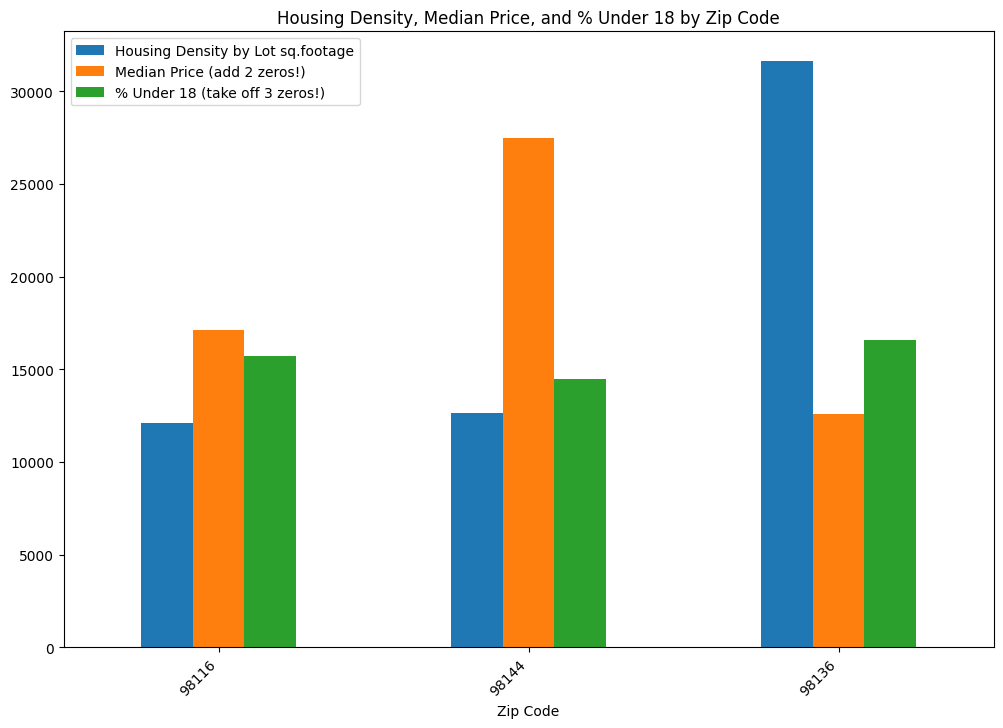

In [ ]:
# Calculate median sqft_lot15 for each zipcode
median_sqft_lot15 = df_9km.groupby('zipcode')['sqft_lot15'].median()

# Calculate median price for each zipcode and divide by 1000
median_price = df_9km.groupby('zipcode')['price'].median() / 100

# Combine median_sqft_lot15 and median_price into a DataFrame
df_combined = pd.DataFrame({'Housing Density by Lot sq.footage': median_sqft_lot15, 'Median Price (add 2 zeros!)': median_price})

# Sort zip codes based on median sqft_lot15
sorted_zipcodes = median_sqft_lot15.sort_values().index

# Reorder the levels of the 'zipcode' column
df_combined = df_combined.loc[sorted_zipcodes]

# Calculate median %_under_18 for each zipcode
median_under_18 = df_9km.groupby('zipcode')['%_under_18'].median() * 1000

# Combine median_under_18 with existing DataFrame
df_combined['% Under 18 (take off 3 zeros!)'] = median_under_18

# Plot the three columns side by side for each zipcode
ax = df_combined.plot(kind='bar', figsize=(12, 8))

# Set title and labels
plt.title('Housing Density, Median Price, and % Under 18 by Zip Code')
plt.xlabel('Zip Code')
plt.xticks(rotation=45, ha='right')

plt.show()


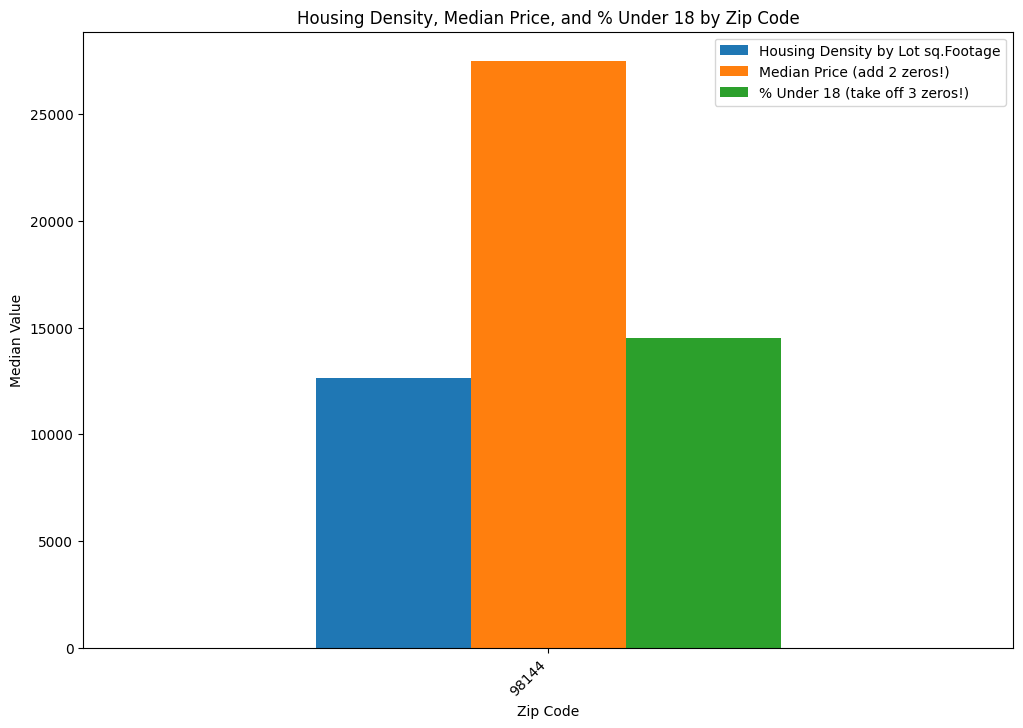

In [ ]:
# Calculate median sqft_lot15 for each zipcode
median_sqft_lot15 = df_4km.groupby('zipcode')['sqft_lot15'].median()

# Calculate median price for each zipcode and divide by 1000
median_price = df_4km.groupby('zipcode')['price'].median() / 100

# Combine median_sqft_lot15 and median_price into a DataFrame
df_combined = pd.DataFrame({'Housing Density by Lot sq.Footage': median_sqft_lot15, 'Median Price (add 2 zeros!)': median_price})

# Sort zip codes based on median sqft_lot15
sorted_zipcodes = median_sqft_lot15.sort_values().index

# Reorder the levels of the 'zipcode' column
df_combined = df_combined.loc[sorted_zipcodes]

# Calculate median %_under_18 for each zipcode
median_under_18 = df_4km.groupby('zipcode')['%_under_18'].median() * 1000

# Combine median_under_18 with existing DataFrame
df_combined['% Under 18 (take off 3 zeros!)'] = median_under_18

# Plot the three columns side by side for each zipcode
ax = df_combined.plot(kind='bar', figsize=(12, 8))

# Set title and labels
plt.title('Housing Density, Median Price, and % Under 18 by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Median Value')
plt.xticks(rotation=45, ha='right')

plt.show()